In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# matplotlib.rc('font',family = font_name)

mfile_model = pd.read_csv('mfile_model.csv', encoding = 'utf-8')
#mfile.head()
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')

mfile = pd.read_csv('mfile_model.csv', encoding = 'utf-8')

# import pandas_profiling as pp

from sklearn.tree import export_graphviz

# import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

total4 = pd.read_csv('total4.csv')



In [2]:
mfile_merge = total4.merge(mfile.drop(['조합원상태','구매금액'], axis = 1), on = '회원번호', how = 'inner')
mfile_merge

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
1,2018-01-02,220954944,정상회원,채소,잎/줄기채소,적양배추,적양배추(1통:600g이상),1.0,4212.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
2,2018-01-02,220954944,정상회원,수산,해조,김,구운김밥김(10장),1.0,3446.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
3,2018-01-02,220954944,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),2.0,14932.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
4,2018-01-02,220954944,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290674,2018-10-30,1644957952,정상회원,반찬,두부/유부,두부,두부(1모:420g)-쿠폰북행사,1.0,3446.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290675,2018-10-30,1644957952,정상회원,간식,떡,가래떡,떡볶이떡(유기/500g),1.0,6892.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290676,2018-10-30,670223872,정상회원,음료,음료,두유,검은콩두유(160ml*5봉),6.0,63750.0,매장D,...,55.0,0,0,0,50대,기타,기타,0,1,1
290677,2018-10-31,1046214208,정상회원,서류,감자,감자,감자(1kg),1.0,4977.0,매장D,...,42.0,0,0,0,40대,수지구,성복동,0,1,1


In [72]:
for i in mfile_merge.index:
    mfile_merge['쿠폰북'][i] = "쿠폰북행사" in mfile_merge['물품명'][i]

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
mfile_merge[mfile_merge['쿠폰북'] == 1].groupby(['물품명'])['구매수량'].sum().sort_values(ascending = False)

물품명
두부(1모:420g)-쿠폰북행사         28.0
유정란(15알/매장용)-쿠폰북행사        15.0
꼬마소시지(300g)-쿠폰북행사         12.0
백미/유(2kg)-쿠폰북행사           11.0
우유(범산/900ml)-쿠폰북행사        10.0
감자라면(1묶음:4봉)-쿠폰북행사         8.0
한우고기곰국(냉동:1.1kg)-쿠폰북행사     4.0
유정란(10알/매장용)/쿠폰북행사         4.0
찌개용두부(420g)-쿠폰북행사          1.0
Name: 구매수량, dtype: float64

In [83]:
mfile_merge[mfile_merge['쿠폰북'] == 1].groupby(['공급일자','물품명'])['구매수량'].sum().sort_values(ascending = False).unstack().head(30)

물품명,감자라면(1묶음:4봉)-쿠폰북행사,꼬마소시지(300g)-쿠폰북행사,두부(1모:420g)-쿠폰북행사,백미/유(2kg)-쿠폰북행사,우유(범산/900ml)-쿠폰북행사,유정란(10알/매장용)/쿠폰북행사,유정란(15알/매장용)-쿠폰북행사,찌개용두부(420g)-쿠폰북행사,한우고기곰국(냉동:1.1kg)-쿠폰북행사
공급일자,,,,,,,,,
2018-01-02,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2018-01-29,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2018-02-23,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-24,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2018-03-03,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2018-03-05,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [89]:
mfile_merge.loc[mfile_merge['물품명'].str.contains('꼬마소시지')]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,쿠폰북
2031,2018-10-31,1040210048,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장A,...,0,1,0,40대,수지구,동천동,0,72,1,False
3833,2018-05-03,994142272,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장A,...,0,0,0,40대,수지구,동천동,0,45,1,False
4108,2018-06-12,745991360,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장A,...,0,1,0,40대,수지구,동천동,0,75,1,False
4479,2018-08-18,876408768,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장A,...,0,1,0,40대,수지구,동천동,0,54,1,False
5596,2018-01-29,469100288,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장A,...,0,1,1,40대,수지구,동천동,0,114,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289352,2018-08-12,842187840,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장D,...,1,0,0,30대,수지구,성복동,0,15,0,False
289356,2018-09-18,842187840,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장D,...,1,0,0,30대,수지구,성복동,0,15,0,False
289361,2018-10-11,842187840,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장D,...,1,0,0,30대,수지구,성복동,0,15,0,False
289896,2018-09-19,806420864,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장D,...,0,0,0,30대,기타,기타,0,5,0,False


In [90]:
mfile_merge.loc[mfile_merge['물품명'].str.contains('감자라면')]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,쿠폰북
954,2018-02-20,1019647424,정상회원,간식,밀가공,라면,매운감자라면(110g:1봉),2.0,5360.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,False
956,2018-02-20,1019647424,정상회원,간식,밀가공,라면,감자라면(110g:1봉),2.0,4977.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,False
997,2018-03-26,1019647424,정상회원,간식,밀가공,라면,매운감자라면(110g:1봉),1.0,2680.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,False
1092,2018-07-27,1019647424,정상회원,간식,밀가공,라면,매운감자라면(110g:1봉),2.0,5360.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,False
1288,2018-02-23,393343936,정상회원,간식,밀가공,라면,매운감자라면(1묶음:4봉),1.0,10338.0,매장A,...,0,1,0,40대,수지구,동천동,0,59,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290241,2018-09-02,1345694656,정상회원,간식,밀가공,라면,감자라면(110g:1봉),1.0,2489.0,매장D,...,0,0,0,70대이상,수지구,신봉동,1,4,0,False
290252,2018-08-18,1621648448,정상회원,간식,밀가공,라면,감자라면(1묶음:4봉)-쿠폰북행사,1.0,8615.0,매장D,...,0,0,0,50대,수지구,성복동,0,6,1,True
290265,2018-10-27,1621648448,정상회원,간식,밀가공,라면,감자라면(1묶음:4봉),1.0,9572.0,매장D,...,0,0,0,50대,수지구,성복동,0,6,1,False
290310,2018-10-04,986089088,정상회원,간식,밀가공,라면,감자라면(1묶음:4봉),2.0,19144.0,매장D,...,0,0,0,20대이하,기타,기타,0,2,0,False


In [91]:
mfile_merge.groupby(['물품소분류'])['구매수량'].sum().sort_values(ascending = False)[:30]

물품소분류
두부          24112.00
유정란         14803.50
스낵          13845.50
우유/산양유       7353.00
김가공          7218.00
과즙           7188.15
콩나물          7145.00
오이           4471.10
양파           4394.60
식사대용/기타      3665.50
당근           3647.40
라면           3610.00
멥쌀           3591.00
무항생제닭        3558.00
식빵, 식사대용     3475.00
논지엠오유정란      3380.00
냉동생선         3236.90
아이스크림        3180.00
즉석떡          3177.00
돼지(중량)       3148.70
가래떡          3124.00
콩가공/기타       2880.00
식육추출가공       2866.20
햄/소시지/훈제     2771.00
간편조리면        2770.00
어묵           2753.00
미역/다시마       2746.00
김            2711.00
기름           2704.00
요구르트         2699.00
Name: 구매수량, dtype: float64

In [85]:
mfile_merge.groupby(['물품명'])['구매수량'].sum().sort_values(ascending = False)[:30]

물품명
두부(1모:420g)            13737.0
콩나물(300g)               7050.0
유정란/매장용(15알/국내산)        5966.0
찌개용두부(420g)             5458.0
오이(3개)                  3862.0
유정란/매장용(10알/국내산)        3322.0
양파(1kg)                 2861.0
당근(500g)                2671.0
중파(500g)                2311.0
구운도시락김(5g*3봉)           2261.0
유정란/매장용(안심대안사료/15알)     2242.0
유기농우유(종이팩/900ml)        2213.0
콩국물(300g)               2163.0
시금치(300g)               2068.0
팽이버섯(150g)              2004.0
동물복지유정란(15알/국내산)        1998.0
깻잎(30장)                 1870.0
애호박(1개)                 1791.0
동물복지유정란(10알/국내산)        1692.0
검은콩두유(160ml*5봉)         1628.0
명태참어묵(300g)             1489.0
연두부(100g)               1394.0
가지(2개)                  1380.0
양배추(1통:1kg이상)           1308.9
구운전장김(40g)              1266.0
상추(200g)                1262.0
유기농저지방우유(종이팩/900ml)     1254.0
동치미냉면육수(330g)           1223.0
아이스바우유(75ml)            1213.0
상큼한감귤&한라봉(125ml*3개)     1199.0
Name: 구매수량, dtype: float64

In [93]:
mfile_merge[mfile_merge['물품소분류'] == "과즙"]['물품명'].unique()

array(['상큼한감귤&한라봉(125ml*24개)', '포도즙(팩:120ml*20봉)', '감귤즙(유기/150ml)',
       '상큼한감귤&한라봉(125ml*3개)', '아로니아즙(720ml)', '포도즙(1상자:180ml*10병)',
       '무농약사과즙(1L)', '유자주스(1l)', '아로니아즙모음(720ml*2병)', '사과당근즙(130ml)',
       '상큼한감귤&채소(125ml*3개)', '상큼한감귤(125ml*3개)', '배즙(120ml/1봉-매장용)',
       '상큼한포도(120ml)', '한울사과즙(120ml)', '감귤즙(620ml)', '사과당근즙(150ml*10개)',
       '한울사과즙(120ml*20봉)', '배즙(1상자:120ml*30봉)', '사과당근즙(130ml*10봉)',
       '상큼한감귤&채소(125ml*24개)', '사과당근즙(150ml)', '포도즙(1l)', '감귤즙(150ml)',
       '포도즙(팩)120ml', '감귤즙(유기/150ml*10봉)', '포도즙(180ml*1병:매장용)',
       '사과즙(620ml)', '사과즙(매장/한울:180ml)', '상큼한포도(120ml*10봉)',
       '상큼한감귤(125ml*24개)', '사과즙(180ml*10병)', '가시복분자즙(100ml*10봉)',
       '가시복분자즙(100ml*20봉)', '어린이주스(150ml)', '가시복분자즙(100ml/1봉)',
       '감귤즙(150ml*10개)', '상큼한감귤(125ml*3개)-쿠폰북', '어린이주스(150ml*10개)'],
      dtype=object)

In [3]:
mfile_merge.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대'],
      dtype='object')

In [6]:
mfile_merge.groupby(['월','요일'])['구매금액'].agg('mean').unstack()

요일,금,목,수,월,일,토,화
월,,,,,,,
1,11031.507955,10808.671982,11134.414937,10698.817865,11240.070416,11226.038181,11112.755661
2,13086.671315,12582.402908,13240.149182,11655.961190,12085.169045,11630.191661,13578.807951
3,11595.138829,10675.303650,10588.313266,10362.667731,11057.426972,11128.787503,10899.643775
4,11001.066766,10519.450150,10544.488201,10835.929245,10897.783096,11513.352401,10279.477369
5,11039.996180,11143.004262,10992.071257,10874.643889,11305.815411,11096.885955,10960.746129
6,10904.468392,10861.253144,10862.006183,10425.592113,10406.519118,10805.468744,10145.260009
7,11097.291817,10968.294163,11071.692060,13090.021167,10298.946717,11639.672900,10650.074840
8,10587.685617,11620.007130,10699.223909,11869.356703,10727.528754,11051.302554,10565.395121
9,12542.498000,12074.374756,12269.394686,11536.259479,12902.748402,12442.587267,12846.880103


In [8]:
df_month_day = mfile_merge.groupby(['월','요일'])['구매금액'].sum().unstack()
df_month_day = df_month_day[['월','화','수','목','금','토','일']]
df_month_day

요일,월,화,수,목,금,토,일
월,,,,,,,
1,52220930.0,60853450.0,57397909.0,42705063.0,46453680.0,46161469.0,25380079.0
2,59165659.0,62503253.0,68782575.0,48467416.0,41288448.0,37379436.0,22019178.0
3,48683813.0,44121758.0,38869698.0,53227064.0,64979158.0,55566036.0,22711955.0
4,66619293.0,41107630.0,40216678.0,38511707.0,44158282.0,43877386.0,29140672.0
5,50447473.0,55220239.0,54916388.0,54901582.0,49127983.0,30261208.0,25969458.0
6,53139243.0,43076774.0,33378945.0,46638221.0,61926476.0,56523407.0,23133692.0
7,93999442.0,58202659.0,44762851.0,42655696.0,46242415.0,45441283.0,27446693.0
8,65518849.0,39842105.0,50746419.0,66815041.0,49539781.0,42845900.0,20146299.0
9,40769141.0,39966644.0,37863352.0,49553234.0,59564323.0,74070722.0,38359871.0


In [ ]:
df_month_day = mfile_merge.groupby(['월','요일'])['구매금액'].sum().unstack()
df_month_day = df_month_day[['월','화','수','목','금','토','일']]
df_month_day

In [10]:
sat_9 = mfile_merge[(mfile_merge['월'] == 9) & (mfile_merge['요일'] == "토")]

In [11]:
sat_9

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
268,2018-09-08,220954944,정상회원,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용,1.0,30056.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
269,2018-09-08,220954944,정상회원,간식,빵,앙금크림빵,크림빵(75g)/매장,2.0,6126.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
273,2018-09-15,220954944,정상회원,간식,빵,앙금크림빵,크림빵(75g)/매장,2.0,6126.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
279,2018-09-22,220954944,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,3542.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
280,2018-09-22,220954944,정상회원,생활용품,화장품,세안제/팩,수피아 해맑은 클렌징폼(120㎖),1.0,16655.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290522,2018-09-29,905280704,정상회원,양념/가루,가루,곡식가루,볶은콩가루(무/300g),1.0,10912.0,매장D,...,48.0,0,1,0,40대,수지구,성복동,0,1,1
290523,2018-09-29,905280704,정상회원,잡곡,콩/화본/깨,화본,기장/유(500g),1.0,17613.0,매장D,...,48.0,0,1,0,40대,수지구,성복동,0,1,1
290524,2018-09-29,1636032448,정상회원,과실,과일,배,배/유(대:3개),1.0,18761.0,매장D,...,75.0,0,0,0,70대이상,수지구,신봉동,1,1,0
290525,2018-09-29,1016044928,정상회원,간식,식사대용,선식/생식,대장부참식(700g),1.0,29482.0,매장D,...,52.0,0,0,0,50대,수지구,신봉동,0,1,1


In [13]:
sat_8 = mfile_merge[(mfile_merge['월'] == 8) & (mfile_merge['요일'] == "토")]
sat_8

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
222,2018-08-04,220954944,정상회원,채소,쌈채소류,상추,상추(200g),1.0,3733.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
223,2018-08-04,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,7466.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
224,2018-08-04,220954944,정상회원,축산물,알,논지엠오유정란,유정란/매장용(안심대안사료/15알),1.0,13401.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
237,2018-08-18,220954944,정상회원,채소,열매채소,가지,가지(4개),1.0,3829.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
238,2018-08-18,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,7466.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290251,2018-08-18,1621648448,정상회원,수산,수산가공,국/탕(수산),섬진강재첩국(500g),-1.0,-8806.0,매장D,...,51.0,0,0,0,50대,수지구,성복동,0,6,1
290252,2018-08-18,1621648448,정상회원,간식,밀가공,라면,감자라면(1묶음:4봉)-쿠폰북행사,1.0,8615.0,매장D,...,51.0,0,0,0,50대,수지구,성복동,0,6,1
290253,2018-08-18,1621648448,정상회원,양념/가루,가루,프리믹스,찹쌀호떡가루(540g),-1.0,-9572.0,매장D,...,51.0,0,0,0,50대,수지구,성복동,0,6,1
290254,2018-08-18,1621648448,정상회원,양념/가루,가루,프리믹스,찹쌀호떡가루(540g),1.0,9572.0,매장D,...,51.0,0,0,0,50대,수지구,성복동,0,6,1


In [20]:
len(sat_8.물품소분류.unique())

242

In [17]:
sat_9.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False)[:30]

물품소분류
유정란         2901870.0
멥쌀          2723820.0
한우          2636535.0
포도(혼합포도)    2319504.0
한우(중량)      2229749.0
추출/농축액      2161313.0
송편          2119831.0
냉동생선        1970317.0
두부          1659301.0
복숭아         1518523.0
돼지(중량)      1081196.0
사과          1064423.0
스낵          1020105.0
간편요리        1008717.0
한과/유과       1006938.0
우유/산양유       988039.0
논지엠오유정란      892125.0
표고버섯         825391.0
한우(냉장)       805393.0
음료기타         796190.0
보리살림(냉장)     793139.0
무항생제닭        792852.0
과즙           735975.0
꿀            716948.0
홍삼           715225.0
김가공          686310.0
보리살림돼지       678852.0
잣            672150.0
기타냉동수산       671766.0
기름           664873.0
Name: 구매금액, dtype: float64

In [18]:
sat_8.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False)[:30]

물품소분류
멥쌀          1777341.0
유정란         1485207.0
한우(냉장)      1116867.0
복숭아         1063655.0
과즙          1031922.0
한우(중량)      1017723.0
냉동생선         956059.0
두부           882254.0
우유/산양유       875220.0
추출/농축액       843279.0
한우           832006.0
식육추출가공       787586.0
두유           700961.0
포도(혼합포도)     700297.0
햄/소시지/훈제     639990.0
돼지(중량)       638873.0
무항생제닭        594811.0
스낵           583142.0
완숙토마토        562260.0
논지엠오유정란      540252.0
식사대용/기타      530293.0
보리살림(냉장)     526655.0
기름           495836.0
사과           471903.0
김가공          469219.0
기타냉동수산       447015.0
콩가공/기타       407299.0
오이           396655.0
방울토마토        379810.0
수박           358571.0
Name: 구매금액, dtype: float64

In [21]:
sat_9.groupby(['물품소분류'])['구매수량'].sum().sort_values(ascending = False)[:30]

물품소분류
두부          485.00
유정란         284.00
스낵          220.00
김가공         150.00
콩나물         149.00
송편          144.00
과즙          133.80
우유/산양유      133.00
멥쌀          111.00
음료기타        107.00
냉동생선        103.00
오이           99.00
가지           89.00
포도(혼합포도)     81.00
양파           74.00
한과/유과        72.43
애호박          71.00
한우(중량)       70.00
간편요리         69.00
중파           68.00
논지엠오유정란      65.00
사과           64.00
한우           61.00
라면           60.00
무항생제닭        60.00
가래떡          59.00
깻잎           58.00
식빵, 식사대용     57.00
기타양념         56.00
아이스크림        56.00
Name: 구매수량, dtype: float64

In [22]:
sat_8.groupby(['물품소분류'])['구매수량'].sum().sort_values(ascending = False)[:30]

물품소분류
두부          265.0
콩가공/기타      185.0
유정란         156.0
스낵          142.0
과즙          131.5
김가공         118.0
우유/산양유      109.0
오이           92.0
아이스크림        90.0
빙과           88.0
간편조리면        86.0
애호박          78.0
가지           77.0
중파           70.0
콩나물          66.0
식사대용/기타      64.0
두유           63.0
냉동생선         61.0
당근           56.0
멥쌀           54.0
식빵, 식사대용     50.0
라면           47.0
국수           46.0
양파           45.0
무항생제닭        44.0
햄/소시지/훈제     44.0
방울토마토        44.0
가래떡          43.0
복숭아          42.0
양배추          42.0
Name: 구매수량, dtype: float64

In [23]:
mon_7 = mfile_merge[(mfile_merge['월'] == 7) & (mfile_merge['요일'] == "월")]
mon_7

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
202,2018-07-16,220954944,정상회원,채소,잎/줄기채소,열무,열무(500g),1.0,3542.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
203,2018-07-16,220954944,정상회원,양념/가루,가루,양념가루,볶은참깨(150g),1.0,11295.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
356,2018-07-16,89023040,정상회원,채소,콩나물,콩나물,콩나물(300g),1.0,2489.0,매장A,...,48.0,1,0,0,40대,분당구,구미동,0,23,1
357,2018-07-16,89023040,정상회원,음료,음료,푸딩,한입쏙쏙젤리포도(25g*10개),2.0,13975.0,매장A,...,48.0,1,0,0,40대,분당구,구미동,0,23,1
361,2018-07-30,89023040,정상회원,축산물,돼지,보리살림(냉장),앞다리불고기용(보리살림/300g/신선육),1.0,11869.0,매장A,...,48.0,1,0,0,40대,분당구,구미동,0,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290091,2018-07-30,358824192,정상회원,수산,해조,미역/다시마,자른미역(50g),2.0,5360.0,매장D,...,61.0,0,0,0,60대,수지구,신봉동,1,2,1
290092,2018-07-30,358824192,정상회원,간식,밀가공,만두,물만두(500g),1.0,10529.0,매장D,...,61.0,0,0,0,60대,수지구,신봉동,1,2,1
290093,2018-07-30,358824192,정상회원,수산,건어물,멸치류,볶음멸치/상(300g),1.0,16655.0,매장D,...,61.0,0,0,0,60대,수지구,신봉동,1,2,1
290095,2018-07-30,644150784,정상회원,간식,떡,가래떡,현미가래떡(400g),2.0,11486.0,매장D,...,61.0,0,0,0,60대,수지구,신봉동,1,3,1


In [24]:
mon_7.groupby(['공급일자'])['구매금액'].sum()

공급일자
2018-07-02    14862083.0
2018-07-09    12107099.0
2018-07-16    26665115.0
2018-07-23    29499403.0
2018-07-30    10865742.0
Name: 구매금액, dtype: float64

In [25]:
mfile_merge.groupby(['공급일자'])['구매금액'].sum().sort_values(ascending = False)[:30]

공급일자
2018-02-14    35877707.0
2018-09-22    30635721.0
2018-07-23    29499403.0
2018-08-13    28040400.0
2018-08-23    27477633.0
2018-09-21    26735377.0
2018-07-16    26665115.0
2018-02-13    24163983.0
2018-02-12    21540545.0
2018-02-06    17665121.0
2018-03-30    16542106.0
2018-10-13    16299912.0
2018-09-20    16068068.0
2018-09-18    15965963.0
2018-09-10    15626186.0
2018-09-23    15609383.0
2018-02-10    15523326.0
2018-04-09    15478586.0
2018-02-09    15445881.0
2018-09-19    15408548.0
2018-07-02    14862083.0
2018-06-25    14178503.0
2018-06-27    14158669.0
2018-01-22    14126286.0
2018-01-02    14034740.0
2018-10-31    14005538.0
2018-04-02    13992984.0
2018-07-07    13965526.0
2018-02-05    13902310.0
2018-07-03    13876853.0
Name: 구매금액, dtype: float64

In [30]:
test = mfile_merge[mfile_merge['공급일자'] == "2018-02-14"]
test

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
452,2018-02-14,178387584,정상회원,채소,콩나물,콩나물,콩나물(300g),4.0,9955.0,매장A,...,72.0,0,0,0,70대이상,수지구,동천동,1,77,0
453,2018-02-14,178387584,정상회원,간식,떡,가래떡,떡국떡(유기:800g),3.0,34459.0,매장A,...,72.0,0,0,0,70대이상,수지구,동천동,1,77,0
454,2018-02-14,178387584,정상회원,채소,콩나물,숙주나물,숙주나물(300g),4.0,16081.0,매장A,...,72.0,0,0,0,70대이상,수지구,동천동,1,77,0
455,2018-02-14,178387584,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),2.0,14167.0,매장A,...,72.0,0,0,0,70대이상,수지구,동천동,1,77,0
456,2018-02-14,178387584,정상회원,수산,냉동수산,기타냉동수산,얼린숫꽃게(1kg),2.0,74662.0,매장A,...,72.0,0,0,0,70대이상,수지구,동천동,1,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286160,2018-02-14,518518144,정상회원,간식,밀가공,라면,쌀라면/김치맛(114g:1봉),3.0,8041.0,매장D,...,76.0,0,0,0,70대이상,수지구,신봉동,1,10,0
286172,2018-02-14,1303587584,정상회원,서류,고구마,호박고구마,호박고구마(1kg),1.0,8041.0,매장D,...,34.0,0,0,0,30대,기타,기타,0,7,0
286179,2018-02-14,119027136,정상회원,반찬,두부/유부,두부,두부(1모:420g),5.0,19144.0,매장D,...,55.0,0,0,0,50대,수지구,신봉동,0,6,1
286189,2018-02-14,403067520,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장D,...,70.0,0,0,0,70대이상,수지구,신봉동,1,10,0


In [31]:
A_test = test[test['구매매장'] == "매장A"]
B_test = test[test['구매매장'] == "매장B"]
C_test = test[test['구매매장'] == "매장C"]
D_test = test[test['구매매장'] == "매장D"]


In [53]:
B_test.groupby(['회원번호'])['구매금액'].sum().sort_values(ascending = False)

회원번호
1451401280    555180.0
473608512     458502.0
19996544      271081.0
1250821504    269167.0
53905664      229730.0
                ...   
210307072       3255.0
768042496       2776.0
1482606208      2489.0
856341696       2489.0
1236797568      2297.0
Name: 구매금액, Length: 216, dtype: float64

In [55]:
B_test[B_test['회원번호'] == 1451401280]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
85364,2018-02-14,1451401280,정상회원,축산물,소,한우,한우찜갈비(3kg),2.0,555180.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1


In [56]:
mfile_merge[mfile_merge['회원번호'] == 1451401280]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
85353,2018-01-02,1451401280,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85354,2018-01-17,1451401280,정상회원,채소,뿌리채소,당근,당근(1kg),1.0,4786.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85355,2018-01-17,1451401280,정상회원,축산물,알,유정란,동물복지유정란/중란(10알/국내산),2.0,11104.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85356,2018-01-17,1451401280,정상회원,채소,잎/줄기채소,쑥갓,쑥갓(200g),1.0,2776.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85357,2018-01-17,1451401280,정상회원,간식,밀가공,라면,감자라면(1묶음:4봉),1.0,9572.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85358,2018-01-30,1451401280,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85359,2018-01-30,1451401280,정상회원,간식,밀가공,만두,물만두(500g),1.0,10529.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85360,2018-02-06,1451401280,정상회원,축산물,소,한우,한우국거리(300g/국내산),2.0,64324.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85361,2018-02-06,1451401280,정상회원,채소,말린나물/건재,말린고사리(70g),말린고사리/무농약(70g),2.0,29482.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1
85362,2018-02-06,1451401280,정상회원,채소,버섯,표고버섯,말린표고버섯(150g),1.0,17517.0,매장B,...,66.0,1,0,0,60대,수지구,상현동,1,13,1


In [32]:
test.groupby(['구매매장'])['구매금액'].sum()

구매매장
매장A     6235217.0
매장B     8836254.0
매장C    13129800.0
매장D     7676436.0
Name: 구매금액, dtype: float64

In [35]:
mfile_merge.groupby(['구매매장'])['구매금액'].sum()

구매매장
매장A    5.897796e+08
매장B    7.192244e+08
매장C    1.340842e+09
매장D    6.359196e+08
Name: 구매금액, dtype: float64

In [94]:
store_month_day = mfile_merge.groupby(['구매매장','월','요일'])['구매금액'].sum().unstack()
store_month_day = store_month_day[['월','화','수','목','금','토','일']]
store_month_day

구매매장  월 
매장A   1      8629620.0
      2     10016636.0
      3      8899223.0
      4     10784276.0
      5      9262276.0
      6      8626835.0
      7     28768879.0
      8      9279745.0
      9      8294852.0
      10    10631577.0
매장B   1     12418530.0
      2     13701382.0
      3      9871103.0
      4     14443048.0
      5     11087734.0
      6     12514948.0
      7     26416783.0
      8     11476402.0
      9      8371286.0
      10    13755543.0
매장C   1     20971600.0
      2     24501804.0
      3     20067435.0
      4     29104752.0
      5     20121351.0
      6     22534136.0
      7     26257002.0
      8     35036677.0
      9     15542981.0
      10    24404439.0
매장D   1     10201180.0
      2     10945837.0
      3      9846052.0
      4     12287217.0
      5      9976112.0
      6      9463324.0
      7     12556778.0
      8      9726025.0
      9      8560022.0
      10    10644072.0
Name: 월, dtype: float64

In [95]:
store_month_day['합계'] = 0
for i in store_month_day.columns:
    store_month_day['합계'] += store_month_day[i]
store_month_day

요일                월           화           수           목           금  \
구매매장 월                                                                
매장A  1    8629620.0  13621477.0  10488870.0   8417643.0   7720992.0   
     2   10016636.0  10145388.0  11979986.0   8550266.0   7621076.0   
     3    8899223.0   7710065.0   7295374.0   8522305.0  11595336.0   
     4   10784276.0   6394046.0   8069798.0   6498338.0   7985272.0   
     5    9262276.0   8738895.0  10167830.0   9092539.0   8801203.0   
     6    8626835.0   7156202.0   6052861.0   7694620.0   9824080.0   
     7   28768879.0  10294139.0   7413830.0   7236459.0   7410018.0   
     8    9279745.0   7080376.0   9318272.0   8617410.0   9158453.0   
     9    8294852.0   7336645.0   7179256.0   8309877.0  11663982.0   
     10  10631577.0   9220311.0  10775379.0   6804679.0   6544401.0   
매장B  1   12418530.0  13060400.0  13415474.0   9090489.0   9808648.0   
     2   13701382.0  12131081.0  15489282.0   9784096.0   9099575.0   
     3    9871103.0   9639636.0   8786226.0  10529820.0  15482167.0   
     4   14443048.0   9054778.0   8309912.0   8199436.0   8665993.0   
     5   11087734.0  13477718.0  10508078.0  12118256.0  11119998.0   
     6   12514948.0   9050940.0   6747651.0  11274646.0  14270947.0   
     7   26416783.0  11988686.0   9628610.0   9776952.0  10737709.0   
     8   11476402.0   8402373.0  11349313.0  11411116.0  10334121.0   
     9    8371286.0   9364949.0   7726064.0  11707124.0  14054055.0   
     10  13755543.0  11454016.0  10970284.0   8970194.0   7747396.0   
매장C  1   20971600.0  25136537.0  23723088.0  17382018.0  20049059.0   
     2   24501804.0  28533625.0  27848734.0  20053944.0  14543579.0   
     3   20067435.0  18959045.0  15449903.0  22878943.0  25912930.0   
     4   29104752.0  18196814.0  16643803.0  16054649.0  18728220.0   
     5   20121351.0  22888371.0  22747088.0  23733824.0  20182143.0   
     6   22534136.0  18952478.0  13577964.0  18729381.0  25612092.0   
     7   26257002.0  23954274.0  19213069.0  17330700.0  18515509.0   
     8   35036677.0  16720471.0  20728029.0  21605981.0  20238406.0   
     9   15542981.0  15538333.0  14072491.0  18299032.0  23199661.0   
     10  24404439.0  21519094.0  22573561.0  16622279.0  15616385.0   
매장D  1   10201180.0   9035036.0   9770477.0   7814913.0   8874981.0   
     2   10945837.0  11693159.0  13464573.0  10079110.0  10024218.0   
     3    9846052.0   7813012.0   7338195.0  11295996.0  11988725.0   
     4   12287217.0   7461992.0   7193165.0   7759284.0   8778797.0   
     5    9976112.0  10115255.0  11493392.0   9956963.0   9024639.0   
     6    9463324.0   7917154.0   7000469.0   8939574.0  12219357.0   
     7   12556778.0  11965560.0   8507342.0   8311585.0   9579179.0   
     8    9726025.0   7638885.0   9350805.0  25180534.0   9808801.0   
     9    8560022.0   7726717.0   8885541.0  11237201.0  10646625.0   
     10  10644072.0   8710789.0  10455193.0   7561615.0   7283166.0   

요일                토           일           합계  
구매매장 월                                        
매장A  1    9839597.0   4719513.0  126875424.0  
     2    6212175.0   3850272.0  116751598.0  
     3   10226998.0   4169472.0  116837546.0  
     4    7359063.0   5733095.0  105647776.0  
     5    4906953.0   4575940.0  111091272.0  
     6    9685839.0   4652473.0  107385820.0  
     7    6688275.0   5755500.0  147134200.0  
     8    6847507.0   4113170.0  108829866.0  
     9   15182859.0   6393995.0  128722932.0  
     10   6634194.0   4530840.0  110282762.0  
매장B  1    9853362.0   5268071.0  145829948.0  
     2    9011921.0   4522026.0  147478726.0  
     3   12175494.0   5554955.0  144078802.0  
     4   11060985.0   6906714.0  133281732.0  
     5    6923772.0   5754672.0  141980456.0  
     6   11750747.0   5845915.0  142911588.0  
     7    9308208.0   5689796.0  167093488.0  
     8   10089326.0   4113058.0  134351418.0  
     9   14765035.0   8233457.0  148443940.0  
     10   9314031.0   4287859.

In [57]:
mfile_merge.groupby(['회원번호'])['구매금액'].sum().sort_values(ascending = False)[:30]

회원번호
436681536     9770784.0
381879424     9160944.0
193003584     6692889.0
762476352     5763824.0
606984384     5752051.0
635659584     5662929.0
72796032      5640692.0
308569280     5620389.0
463331840     5584826.0
444617792     5533183.0
86983296      5249363.0
153723200     5248304.0
1283121472    5192920.0
138689600     5137458.0
406632896     5107832.0
59774336      5033101.0
548171456     5016084.0
744588224     4846438.0
993938112     4845031.0
48638336      4705219.0
1126443520    4542011.0
120849728     4522092.0
58484416      4441424.0
971601152     4344200.0
52903424      4283018.0
153747328     4242746.0
178387584     4240718.0
269246208     4235248.0
149426560     4213420.0
765542464     4135364.0
Name: 구매금액, dtype: float64

In [58]:
mfile_merge[mfile_merge['회원번호'] == 436681536]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
170671,2018-01-02,436681536,정상회원,축산물,유제품,우유/산양유,유기농우유(종이팩/900ml),1.0,8041.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
170672,2018-01-03,436681536,정상회원,건강,건강일반,추출/농축액,채소액(유기/150ml*30봉),1.0,50732.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
170673,2018-01-03,436681536,정상회원,수산,수산가공,수산가공반찬,순살가자미가스(300g),1.0,22016.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
170674,2018-01-03,436681536,정상회원,축산물,육가공,돈가스/분쇄가공,"간장소스순살닭강정(강정400g,소스110g)",1.0,22973.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
170675,2018-01-07,436681536,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171228,2018-10-26,436681536,정상회원,채소,콩나물,콩나물,콩나물(300g),1.0,2489.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
171229,2018-10-28,436681536,정상회원,축산물,유제품,아이스크림,유기농아이스크림(기본형),1.0,17038.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
171230,2018-10-29,436681536,정상회원,축산물,중량(정육),한우(중량),우둔살-성남용인,2.0,92007.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1
171231,2018-10-29,436681536,정상회원,간식,과자,스낵,부숴먹는라면(90g:1봉),2.0,4977.0,매장C,...,51.0,0,1,1,50대,수지구,풍덕천동,0,164,1


In [62]:
mfile_merge[mfile_merge['회원번호'] == 436681536].groupby(['물품명'])['구매수량'].sum().sort_values(ascending = False)[:30]

물품명
깻잎(30장)                     15.0
양파즙(120ml*20봉)              13.0
삼겹살구이-성남용인                  12.0
우리밀해물라면(114g:1봉지)           10.0
꾸러기짱(90g)                   10.0
쌍화차(70ml)                    9.0
얼갈이(500g)                    9.0
감귤꽁꽁(120ml)/매장용              8.0
아이스바딸기(75ml)                 7.0
육개장(700g)                    7.0
생기품은 샴푸(보충용:400㎖)            7.0
호박죽(280g)                    7.0
얼음식혜(1000ml/서정)              6.0
콩나물(300g)                    6.0
상추(200g)                     6.0
동치미냉면육수(330g)                6.0
목심구이-성남용인                    6.0
하늘바다새우(60g)                  6.0
새송이버섯(300g)                  6.0
감자라면(110g:1봉)                6.0
사과/(5kg)/대                   6.0
참외(1kg)                      6.0
항정살-성남용인                     6.0
냉동모듬찰떡(80g*5종)               6.0
수피아 손세정제(보충용:500㎖)           5.0
구운유정란(6알)                    5.0
딸기꽁꽁(120ml)/매장용              5.0
매콤소스순살닭강정(강정400g,소스160g)     5.0
숲사랑 3겹둥근휴지(18롤)              5.0
오미자꽁꽁(120ml/매장용)             5.0
Name: 

In [64]:
onion_sale = mfile_merge[mfile_merge['물품명'] == "양파즙(120ml*20봉)"]
onion_sale.groupby(['구매매장'])['구매수량'].sum()

구매매장
매장A    17.0
매장B    39.0
매장C    41.0
매장D    21.0
Name: 구매수량, dtype: float64

In [96]:
mfile_merge.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대', '쿠폰북'],
      dtype='object')

In [97]:
mfile_merge['시간'] = 0

for i in mfile_merge.index:
    mfile_merge['시간'][i] = mfile_merge['구매시각'][i].split(':')[0]
    if i % 1000 == 0:
        print(i)

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [111]:
mfile_merge.시간.unique()

array([10, 15, 14, 11, 12, 18, 16, 13, 19, 17, 20], dtype=int64)

In [115]:
mfile_merge['시간'].replace(20,19, inplace = True)

In [110]:
mfile_merge.to_csv('mfile_merge_final.csv', index = False)

In [120]:
storeA = mfile_merge[mfile_merge['구매매장'] == "매장A"]
storeB = mfile_merge[mfile_merge['구매매장'] == "매장B"]
storeC = mfile_merge[mfile_merge['구매매장'] == "매장C"]
storeD = mfile_merge[mfile_merge['구매매장'] == "매장D"]


In [122]:
A_10 = storeA[storeA['시간'] == 10]
A_11 = storeA[storeA['시간'] == 11]
A_12 = storeA[storeA['시간'] == 12]
A_13 = storeA[storeA['시간'] == 13]
A_14 = storeA[storeA['시간'] == 14]
A_15 = storeA[storeA['시간'] == 15]
A_16 = storeA[storeA['시간'] == 16]
A_17 = storeA[storeA['시간'] == 17]
A_18 = storeA[storeA['시간'] == 18]
A_19 = storeA[storeA['시간'] == 19]
B_10 = storeB[storeB['시간'] == 10]
B_11 = storeB[storeB['시간'] == 11]
B_12 = storeB[storeB['시간'] == 12]
B_13 = storeB[storeB['시간'] == 13]
B_14 = storeB[storeB['시간'] == 14]
B_15 = storeB[storeB['시간'] == 15]
B_16 = storeB[storeB['시간'] == 16]
B_17 = storeB[storeB['시간'] == 17]
B_18 = storeB[storeB['시간'] == 18]
B_19 = storeB[storeB['시간'] == 19]

C_10 = storeC[storeC['시간'] == 10]
C_11 = storeC[storeC['시간'] == 11]
C_12 = storeC[storeC['시간'] == 12]
C_13 = storeC[storeC['시간'] == 13]
C_14 = storeC[storeC['시간'] == 14]
C_15 = storeC[storeC['시간'] == 15]
C_16 = storeC[storeC['시간'] == 16]
C_17 = storeC[storeC['시간'] == 17]
C_18 = storeC[storeC['시간'] == 18]
C_19 = storeC[storeC['시간'] == 19]
D_10 = storeD[storeD['시간'] == 10]
D_11 = storeD[storeD['시간'] == 11]
D_12 = storeD[storeD['시간'] == 12]
D_13 = storeD[storeD['시간'] == 13]
D_14 = storeD[storeD['시간'] == 14]
D_15 = storeD[storeD['시간'] == 15]
D_16 = storeD[storeD['시간'] == 16]
D_17 = storeD[storeD['시간'] == 17]
D_18 = storeD[storeD['시간'] == 18]
D_19 = storeD[storeD['시간'] == 19]


In [152]:
big_class = A_10.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
df_big_class.reset_index(drop = True, inplace = True)
df_big_class.rename(columns = {'대분류명' : "A_" + str(10) + '_대분류명', '수량' : "A_" + str(10) + '_수량'}, inplace = True)
#df_big_1 = df_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
A_big_1 = df_big_class.sort_values('A_10_수량', ascending = False).head(20)

mid_class = A_10.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
df_mid_class.reset_index(drop = True, inplace = True)
df_mid_class.rename(columns = {'중분류명' : "A_" + str(10) + '_중분류명', '수량' : "A_" + str(10) + '_수량'}, inplace = True)
#df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
A_mid_1 = df_mid_class.sort_values('A_10_수량', ascending = False).head(20)

low_class = A_10.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
df_low_class.reset_index(drop = True, inplace = True)
df_low_class.rename(columns = {'소분류명' : "A_" + str(10) + '_소분류명', '수량' : "A_" + str(10) + '_수량'}, inplace = True)
#df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
A_low_1 = df_low_class.sort_values('A_10_수량', ascending = False).head(20)

item_class = A_10.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
df_item_class.reset_index(drop = True, inplace = True)
df_item_class.rename(columns = {'물품명' : "A_" + str(10) + '_물품명', '수량' : "A_" + str(10) + '_수량'}, inplace = True)
#df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')
A_item_1 = df_item_class.sort_values('A_10_수량', ascending = False).head(20)
A_item_1

,A_10_물품명,A_10_수량
0,두부(1모:420g),182
1,오이(3개),91
2,콩나물(300g),84
3,유정란/매장용(15알/국내산),70
4,애호박(1개),69
5,양파(1kg),64
6,유정란/매장용(안심대안사료/15알),62
7,시금치(300g),54
8,찌개용두부(420g),51
9,중파(500g),48


In [153]:
big_class = B_10.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
df_big_class.reset_index(drop = True, inplace = True)
df_big_class.rename(columns = {'대분류명' : "B_" + str(10) + '_대분류명', '수량' : "B_" + str(10) + '_수량'}, inplace = True)
#df_big_1 = df_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
B_big_1 = df_big_class.sort_values('B_10_수량', ascending = False).head(20)

mid_class = B_10.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
df_mid_class.reset_index(drop = True, inplace = True)
df_mid_class.rename(columns = {'중분류명' : "B_" + str(10) + '_중분류명', '수량' : "B_" + str(10) + '_수량'}, inplace = True)
#df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
B_mid_1 = df_mid_class.sort_values('B_10_수량', ascending = False).head(20)

low_class = B_10.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
df_low_class.reset_index(drop = True, inplace = True)
df_low_class.rename(columns = {'소분류명' :"B_" +  str(10) + '_소분류명', '수량' : "B_" + str(10) + '_수량'}, inplace = True)
#df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
B_low_1 = df_low_class.sort_values('B_10_수량', ascending = False).head(20)

item_class = B_10.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
df_item_class.reset_index(drop = True, inplace = True)
df_item_class.rename(columns = {'물품명' : "B_" + str(10) + '_물품명', '수량' : "B_" + str(10) + '_수량'}, inplace = True)
#df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')
B_item_1 = df_item_class.sort_values('B_10_수량', ascending = False).head(20)
B_item_1

,B_10_물품명,B_10_수량
0,두부(1모:420g),345
1,콩나물(300g),203
2,오이(3개),145
3,유정란/매장용(15알/국내산),136
4,찌개용두부(420g),130
5,양파(1kg),119
6,애호박(1개),105
7,유정란/매장용(10알/국내산),103
8,깻잎(30장),102
9,중파(500g),101


In [154]:
big_class = C_10.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
df_big_class.reset_index(drop = True, inplace = True)
df_big_class.rename(columns = {'대분류명' : "C_" + str(10) + '_대분류명', '수량' : "C_" + str(10) + '_수량'}, inplace = True)
#df_big_1 = df_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
C_big_1 = df_big_class.sort_values('C_10_수량', ascending = False).head(20)

mid_class = C_10.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
df_mid_class.reset_index(drop = True, inplace = True)
df_mid_class.rename(columns = {'중분류명' : "C_" + str(10) + '_중분류명', '수량' : "C_" + str(10) + '_수량'}, inplace = True)
#df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
C_mid_1 = df_mid_class.sort_values('C_10_수량', ascending = False).head(20)

low_class = C_10.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
df_low_class.reset_index(drop = True, inplace = True)
df_low_class.rename(columns = {'소분류명' : "C_" + str(10) + '_소분류명', '수량' : "C_" + str(10) + '_수량'}, inplace = True)
#df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
C_low_1 = df_low_class.sort_values('C_10_수량', ascending = False).head(20)

item_class = C_10.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
df_item_class.reset_index(drop = True, inplace = True)
df_item_class.rename(columns = {'물품명' : "C_" + str(10) + '_물품명', '수량' : "C_" + str(10) + '_수량'}, inplace = True)
#df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')
C_item_1 = df_item_class.sort_values('C_10_수량', ascending = False).head(20)
C_item_1

,C_10_물품명,C_10_수량
0,두부(1모:420g),515
1,콩나물(300g),364
2,오이(3개),346
3,유정란/매장용(15알/국내산),282
4,애호박(1개),238
5,양파(1kg),222
6,찌개용두부(420g),221
7,중파(500g),182
8,깻잎(30장),181
9,유정란/매장용(10알/국내산),168


In [155]:
big_class = D_10.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
df_big_class.reset_index(drop = True, inplace = True)
df_big_class.rename(columns = {'대분류명' : "D_" + str(10) + '_대분류명', '수량' : "D_" + str(10) + '_수량'}, inplace = True)
#df_big_1 = df_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
D_big_1 = df_big_class.sort_values('D_10_수량', ascending = False).head(20)

mid_class = D_10.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
df_mid_class.reset_index(drop = True, inplace = True)
df_mid_class.rename(columns = {'중분류명' : "D_" + str(10) + '_중분류명', '수량' : "D_" + str(10) + '_수량'}, inplace = True)
#df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
D_mid_1 = df_mid_class.sort_values('D_10_수량', ascending = False).head(20)

low_class = D_10.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
df_low_class.reset_index(drop = True, inplace = True)
df_low_class.rename(columns = {'소분류명' : "D_" + str(10) + '_소분류명', '수량' : "D_" + str(10) + '_수량'}, inplace = True)
#df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
D_low_1 = df_low_class.sort_values('D_10_수량', ascending = False).head(20)

item_class = D_10.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
df_item_class.reset_index(drop = True, inplace = True)
df_item_class.rename(columns = {'물품명' : "D_" + str(10) + '_물품명', '수량' : "D_" + str(10) + '_수량'}, inplace = True)
#df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')
D_item_1 = df_item_class.sort_values('D_10_수량', ascending = False).head(20)
D_item_1

,D_10_물품명,D_10_수량
0,두부(1모:420g),227
1,오이(3개),161
2,찌개용두부(420g),132
3,콩나물(300g),126
4,유정란/매장용(15알/국내산),114
5,애호박(1개),108
6,유정란/매장용(안심대안사료/15알),90
7,중파(500g),78
8,양파(1kg),75
9,당근(500g),69


In [156]:
#A
for i in range(11, 20):
    test_cluster = storeA[storeA['시간']==i]
    
    big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
    df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
    df_big_class.reset_index(drop = True, inplace = True)
    df_big_class.rename(columns = {'대분류명' : "A_" + str(i) + '_대분류명', '수량' : "A_" + str(i) + '_수량'}, inplace = True)
    A_big_1 = A_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
    
    mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
    df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
    df_mid_class.reset_index(drop = True, inplace = True)
    df_mid_class.rename(columns = {'중분류명' : "A_" + str(i) + '_중분류명', '수량' : "A_" + str(i) + '_수량'}, inplace = True)
    A_mid_1 = A_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
    
    low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
    df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
    df_low_class.reset_index(drop = True, inplace = True)
    df_low_class.rename(columns = {'소분류명' : "A_" + str(i) + '_소분류명', '수량' : "A_" + str(i) + '_수량'}, inplace = True)
    A_low_1 = A_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : "A_" + str(i) + '_물품명', '수량' : "A_" + str(i) + '_수량'}, inplace = True)
    A_item_1 = A_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')


In [157]:
#B
for i in range(11, 20):
    test_cluster = storeB[storeB['시간']==i]
    
    big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
    df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
    df_big_class.reset_index(drop = True, inplace = True)
    df_big_class.rename(columns = {'대분류명' : "B_" + str(i) + '_대분류명', '수량' : "B_" + str(i) + '_수량'}, inplace = True)
    B_big_1 = B_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
    
    mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
    df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
    df_mid_class.reset_index(drop = True, inplace = True)
    df_mid_class.rename(columns = {'중분류명' : "B_" + str(i) + '_중분류명', '수량' : "B_" + str(i) + '_수량'}, inplace = True)
    B_mid_1 = B_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
    
    low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
    df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
    df_low_class.reset_index(drop = True, inplace = True)
    df_low_class.rename(columns = {'소분류명' : "B_" + str(i) + '_소분류명', '수량' : "B_" + str(i) + '_수량'}, inplace = True)
    B_low_1 = B_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : "B_" + str(i) + '_물품명', '수량' : "B_" + str(i) + '_수량'}, inplace = True)
    B_item_1 = B_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')

In [158]:
#D
for i in range(11, 20):
    test_cluster = storeD[storeD['시간']==i]
    
    big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
    df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
    df_big_class.reset_index(drop = True, inplace = True)
    df_big_class.rename(columns = {'대분류명' : "D_" + str(i) + '_대분류명', '수량' : "D_" + str(i) + '_수량'}, inplace = True)
    D_big_1 = D_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
    
    mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
    df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
    df_mid_class.reset_index(drop = True, inplace = True)
    df_mid_class.rename(columns = {'중분류명' : "D_" + str(i) + '_중분류명', '수량' : "D_" + str(i) + '_수량'}, inplace = True)
    D_mid_1 = D_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
    
    low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
    df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
    df_low_class.reset_index(drop = True, inplace = True)
    df_low_class.rename(columns = {'소분류명' : "D_" + str(i) + '_소분류명', '수량' : "D_" + str(i) + '_수량'}, inplace = True)
    D_low_1 = D_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : "D_" + str(i) + '_물품명', '수량' : "D_" + str(i) + '_수량'}, inplace = True)
    D_item_1 = D_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')

In [159]:
#C
for i in range(11, 20):
    test_cluster = storeC[storeC['시간']==i]
    
    big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
    df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
    df_big_class.reset_index(drop = True, inplace = True)
    df_big_class.rename(columns = {'대분류명' : "C_" + str(i) + '_대분류명', '수량' : "C_" + str(i) + '_수량'}, inplace = True)
    C_big_1 = C_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
    
    mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
    df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
    df_mid_class.reset_index(drop = True, inplace = True)
    df_mid_class.rename(columns = {'중분류명' : "C_" + str(i) + '_중분류명', '수량' : "C_" + str(i) + '_수량'}, inplace = True)
    C_mid_1 = C_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
    
    low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
    df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
    df_low_class.reset_index(drop = True, inplace = True)
    df_low_class.rename(columns = {'소분류명' : "C_" + str(i) + '_소분류명', '수량' : "C_" + str(i) + '_수량'}, inplace = True)
    C_low_1 = C_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : "C_" + str(i) + '_물품명', '수량' : "C_" + str(i) + '_수량'}, inplace = True)
    C_item_1 = C_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')

In [161]:
D_low_1

,D_10_소분류명,D_10_수량,D_11_소분류명,D_11_수량,D_12_소분류명,D_12_수량,D_13_소분류명,D_13_수량,D_14_소분류명,D_14_수량,D_15_소분류명,D_15_수량,D_16_소분류명,D_16_수량,D_17_소분류명,D_17_수량,D_18_소분류명,D_18_수량,D_19_소분류명,D_19_수량
0,두부,391,두부,328,두부,330,두부,309,두부,284,두부,311,두부,402,두부,348,두부,257,두부,194
1,유정란,257,유정란,257,유정란,202,유정란,229,유정란,232,유정란,243,유정란,258,유정란,237,유정란,215,유정란,130
2,오이,195,우유/산양유,148,스낵,189,스낵,190,스낵,168,스낵,209,스낵,216,스낵,178,스낵,131,스낵,107
3,우유/산양유,194,스낵,141,우유/산양유,163,우유/산양유,110,우유/산양유,111,우유/산양유,139,우유/산양유,145,우유/산양유,129,우유/산양유,115,우유/산양유,71
4,스낵,175,콩나물,128,콩나물,123,콩나물,110,콩나물,94,콩나물,117,콩나물,139,콩나물,111,콩나물,81,콩나물,60
5,애호박,139,양파,115,김가공,98,김가공,84,김가공,82,김가공,109,과즙,107,김가공,81,김가공,58,논지엠오유정란,60
6,콩나물,126,김가공,103,과즙,97,"식빵, 식사대용",84,양파,75,과즙,103,김가공,90,논지엠오유정란,80,양파,55,"식빵, 식사대용",55
7,논지엠오유정란,118,당근,99,양파,94,양파,80,아이스크림,69,양파,91,"식빵, 식사대용",90,양파,77,어묵,50,멥쌀,52
8,양파,113,오이,92,오이,93,과즙,78,무항생제닭,68,멥쌀,90,양파,89,멥쌀,75,멥쌀,50,양파,51
9,사과,111,논지엠오유정란,82,논지엠오유정란,77,냉동생선,75,오이,66,논지엠오유정란,76,냉동생선,87,보리살림(냉장),68,보리살림(냉장),48,보리살림(냉장),47


In [162]:
B_low_1

,B_10_소분류명,B_10_수량,B_11_소분류명,B_11_수량,B_12_소분류명,B_12_수량,B_13_소분류명,B_13_수량,B_14_소분류명,B_14_수량,B_15_소분류명,B_15_수량,B_16_소분류명,B_16_수량,B_17_소분류명,B_17_수량,B_18_소분류명,B_18_수량,B_19_소분류명,B_19_수량
0,두부,583,두부,425,두부,381,두부,349,두부,368,두부,394,두부,466,두부,418,두부,317,두부,228
1,유정란,387,유정란,342,유정란,270,유정란,294,유정란,271,유정란,292,유정란,348,유정란,297,유정란,209,스낵,188
2,스낵,295,스낵,240,스낵,224,스낵,255,스낵,248,스낵,257,스낵,284,스낵,285,스낵,202,유정란,174
3,콩나물,207,콩나물,185,콩나물,139,우유/산양유,138,콩나물,160,콩나물,174,콩나물,175,콩나물,165,우유/산양유,110,콩나물,81
4,우유/산양유,192,우유/산양유,165,우유/산양유,124,콩나물,110,우유/산양유,153,과즙,135,과즙,156,우유/산양유,128,콩나물,79,과즙,71
5,오이,183,양파,116,과즙,107,김가공,102,과즙,130,우유/산양유,116,우유/산양유,134,과즙,126,과즙,75,식사대용/기타,61
6,양파,164,과즙,111,김가공,106,과즙,92,김가공,96,김가공,111,김가공,127,김가공,126,김가공,72,우유/산양유,61
7,과즙,151,오이,110,양파,93,양파,88,양파,94,양파,108,양파,116,양파,85,양파,64,"식빵, 식사대용",54
8,애호박,145,"식빵, 식사대용",110,당근,84,가래떡,77,논지엠오유정란,74,당근,91,보리살림(냉장),94,당근,79,추출/농축액,63,아이스크림,54
9,당근,139,김가공,98,오이,83,보리살림(냉장),75,당근,73,멥쌀,82,무항생제닭,90,무항생제닭,78,당근,59,보리살림(냉장),49


In [133]:
A_low_1

,10_소분류명,10_수량,11_소분류명,11_수량,12_소분류명,12_수량,13_소분류명,13_수량,14_소분류명,14_수량,15_소분류명,15_수량,16_소분류명,16_수량,17_소분류명,17_수량,18_소분류명,18_수량,19_소분류명,19_수량
0,두부,278,두부,291,두부,263,두부,264,두부,270,두부,355,두부,387,두부,320,두부,249,두부,187
1,스낵,228,스낵,180,스낵,213,스낵,204,스낵,212,스낵,263,유정란,257,스낵,251,스낵,177,스낵,174
2,유정란,168,유정란,155,유정란,180,유정란,159,유정란,168,유정란,194,스낵,243,유정란,215,유정란,160,유정란,127
3,우유/산양유,168,우유/산양유,100,우유/산양유,123,우유/산양유,96,우유/산양유,125,우유/산양유,126,우유/산양유,140,우유/산양유,157,우유/산양유,136,우유/산양유,119
4,오이,115,김가공,100,콩나물,111,즉석떡,90,콩나물,93,김가공,125,김가공,136,김가공,132,김가공,105,김가공,85
5,애호박,101,콩나물,85,김가공,103,김가공,86,김가공,91,콩나물,96,과즙,123,과즙,97,콩나물,88,과즙,77
6,김가공,95,즉석떡,85,즉석떡,81,과즙,77,즉석떡,89,과즙,96,콩나물,115,콩나물,92,멥쌀,70,즉석떡,76
7,양파,94,논지엠오유정란,74,과즙,72,멥쌀,76,과즙,84,멥쌀,88,멥쌀,112,식사대용/기타,79,즉석떡,65,콩나물,60
8,즉석떡,93,과즙,73,단과자빵,65,양파,65,멥쌀,75,즉석떡,80,"식빵, 식사대용",87,양파,74,과즙,64,식사대용/기타,57
9,콩나물,86,오이,70,멥쌀,65,콩나물,63,"식빵, 식사대용",61,논지엠오유정란,79,사과,73,만두,58,양파,56,햄/소시지/훈제,55


In [163]:
C_low_1

,C_10_소분류명,C_10_수량,C_11_소분류명,C_11_수량,C_12_소분류명,C_12_수량,C_13_소분류명,C_13_수량,C_14_소분류명,C_14_수량,C_15_소분류명,C_15_수량,C_16_소분류명,C_16_수량,C_17_소분류명,C_17_수량,C_18_소분류명,C_18_수량,C_19_소분류명,C_19_수량
0,두부,1012,두부,924,두부,893,두부,807,두부,819,두부,918,두부,1094,두부,946,두부,805,두부,482
1,유정란,808,유정란,730,유정란,659,유정란,630,유정란,601,유정란,659,유정란,752,유정란,627,유정란,507,유정란,361
2,스낵,435,스낵,439,스낵,405,스낵,448,스낵,390,스낵,464,스낵,501,스낵,485,스낵,395,스낵,288
3,오이,389,콩나물,357,콩나물,298,콩나물,280,콩나물,287,콩나물,284,돼지(중량),353,돼지(중량),361,돼지(중량),283,돼지(중량),172
4,콩나물,371,우유/산양유,274,돼지(중량),292,돼지(중량),265,돼지(중량),253,돼지(중량),263,콩나물,327,콩나물,332,콩나물,253,콩나물,137
5,우유/산양유,338,오이,247,우유/산양유,266,우유/산양유,247,한우(중량),211,과즙,225,우유/산양유,265,우유/산양유,259,우유/산양유,195,우유/산양유,119
6,양파,330,돼지(중량),231,과즙,223,양파,187,우유/산양유,210,우유/산양유,224,과즙,247,한우(중량),224,김가공,173,김가공,119
7,애호박,324,양파,229,한우(중량),192,한우(중량),179,김가공,192,김가공,203,양파,222,과즙,211,과즙,164,한우(중량),117
8,돼지(중량),281,당근,196,양파,190,김가공,178,과즙,177,양파,195,한우(중량),221,김가공,209,한우(중량),163,과즙,115
9,당근,243,한우(중량),192,당근,180,과즙,176,양파,160,한우(중량),184,김가공,216,양파,163,양파,136,양파,98


In [166]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [164]:
age_day_sell = mfile_merge.groupby(['요일','연령대'])['구매금액'].sum().unstack()
age_day_sell = age_day_sell.reindex(['월','화','수','목','금','토','일'])
age_day_sell

연령대,20대이하,30대,40대,50대,60대,70대이상
요일,,,,,,
월,2089225.0,81060280.0,222336006.0,147956602.0,85067936.0,51489425.0
화,1387664.0,62336818.0,188710650.0,131150380.0,69423568.0,42789642.0
수,1215227.0,61517139.0,178351239.0,125095656.0,70437872.0,45092099.0
목,1732134.0,57745006.0,178191908.0,127693164.0,70827332.0,47244247.0
금,1490625.0,59499529.0,184132993.0,134155074.0,71888311.0,49305362.0
토,1769452.0,54564931.0,172479678.0,142930759.0,67062312.0,40176388.0
일,1256098.0,34281984.0,91922886.0,73900977.0,34023143.0,19984263.0


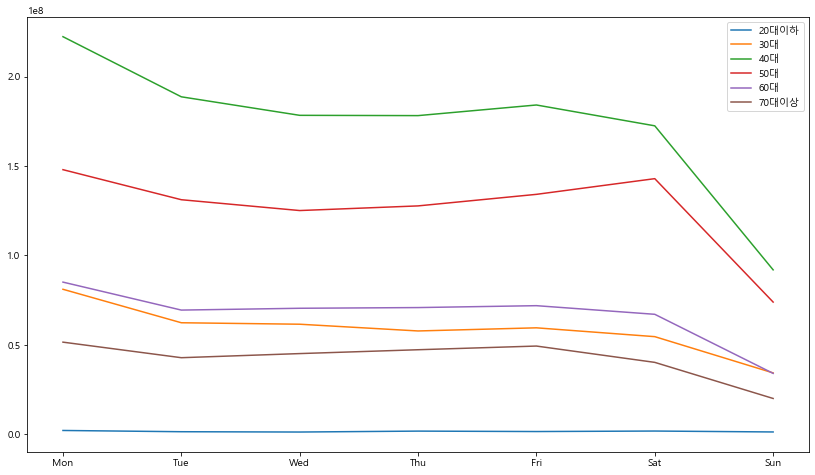

In [167]:
plt.figure(figsize = (14,8))
#day_month_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#age_month_sell_T = age_month_sell.T
age_day_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
for i in age_day_sell.columns:
    plt.plot(age_day_sell.index, age_day_sell[i], label = i)
plt.legend()
plt.show()

# 신규고객 잠재매출 예측

In [3]:
new_customer = mfile_merge.groupby(['회원번호','월'])['방문횟수'].count().unstack()
new_customer.fillna(0, inplace = True)
new_customer

월,1,2,3,4,5,6,7,8,9,10
회원번호,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18764160,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
18792000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18942336,8.0,4.0,0.0,2.0,0.0,1.0,5.0,8.0,3.0,1.0
18949760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1644705536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1644957952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
new_customer['최초방문월'] = 0
temp = 0
for i in new_customer.index:
    temp += 1
    for j in new_customer.columns:
        if new_customer.loc[i][j] != 0:
            new_customer['최초방문월'][i] = j
            
            break
    if temp % 100 == 0:
        print(temp, i, new_customer['최초방문월'][i])

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


100 46568896 1
200 58074240 1
300 67448896 6
400 82805440 3
500 98258496 2
600 116389760 1
700 130614144 1
800 149359744 2
900 164846208 7
1000 182075456 9
1100 195084160 4
1200 208276608 3
1300 224934208 1
1400 240088448 1
1500 254585664 1
1600 267705728 1
1700 278283072 10
1800 292980736 1
1900 309747840 1
2000 324393536 10
2100 345644736 10
2200 358824192 7
2300 377644032 1
2400 392336128 8
2500 405129536 1
2600 418687616 3
2700 433517056 4
2800 445122624 1
2900 460293568 2
3000 472619264 4
3100 480201024 9
3200 514145408 1
3300 538882176 1
3400 552670400 3
3500 563704320 3
3600 575291328 1
3700 588619264 1
3800 601099008 10
3900 613677120 3
4000 629367744 8
4100 643304448 2
4200 657367360 1
4300 670350080 4
4400 682035456 1
4500 692625792 1
4600 706274816 5
4700 720337728 1
4800 732689408 2
4900 743268608 1
5000 745196992 2
5100 747253440 1
5200 748795776 2
5300 752999616 4
5400 761739520 1
5500 763762560 1
5600 766297856 8
5700 768935232 10
5800 775227072 6
5900 787823744 7
6000 8

In [5]:
new_customer.loc[1617220032 ]

월
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8        13.0
9         1.0
10        6.0
최초방문월     8.0
Name: 1617220032, dtype: float64

In [175]:
new_customer.groupby(['최초방문월'])['최초방문월'].count()

최초방문월
1     5481
2     1490
3     1121
4      718
5      612
6      502
7      447
8      421
9      381
10     369
Name: 최초방문월, dtype: int64

In [178]:
cus_10 = new_customer[new_customer['최초방문월'] == 10]
mfile_merge[mfile_merge['회원번호'].isin(cus_10.index)].groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)[:30]

물품명
두부(1모:420g)            26
유정란/매장용(15알/국내산)       15
콩나물(300g)              13
찌개용두부(420g)            10
양파(1kg)                 8
감자(1kg)                 8
팽이버섯(150g)              8
명태참어묵(300g)             8
오이(3개)                  7
유기농우유(종이팩/900ml)        7
검은콩두유(160ml*5봉)         6
얼음식혜(1000ml/남농)         6
사과당근즙(130ml)            5
우리밀곡물와플(80g)            5
애호박(1개)                 5
유정란/매장용(안심대안사료/15알)     5
크림스프(80g)               5
유기농압착콩기름(500ml)         5
차례상약과(350g/10개)         5
두부연어묵(270g)             4
쌈케일(150g)               4
들기름(330ml)              4
유정란(15알/매장용)-쿠폰북행사      4
한우고기곰국(냉동:1.1kg)        4
자른미역(50g)               4
통밀식빵(300g)/매장           4
연근채(300g)               4
상추(200g)                4
크림빵(75g)/매장             4
김밥용햄(285g)-매장           4
Name: 구매수량, dtype: int64

In [179]:
cus_9 = new_customer[new_customer['최초방문월'] == 9]
mfile_merge[mfile_merge['회원번호'].isin(cus_9.index)].groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)[:30]

물품명
두부(1모:420g)            43
콩나물(300g)              31
유정란/매장용(15알/국내산)       25
찌개용두부(420g)            20
동물복지유정란(15알/국내산)       18
양파(1kg)                10
얼음식혜(1000ml/남농)        10
팽이버섯(150g)              8
찹쌀유과(120g)              8
밤고구마(1kg)               8
쌈채소모음(200g)             8
딸기잼(480g)               8
가지(2개)                  8
양배추(0.7~1kg)            7
중파(500g)                7
하늘바다새우(60g)             7
유정란/매장용(안심대안사료/15알)     7
유기농우유(종이팩/900ml)        7
검은콩두유(160ml*5봉)         7
오이(3개)                  7
솔부추(100g)               6
감자(1kg)                 6
황토숙주나물(300g)            6
사과(2kg)                 6
크림빵(75g)/매장             5
카스텔라(소:100g)/매장         5
백미/유(4kg)-매장용           5
옥수수병조림(310g)            5
차례상약과(350g/10개)         5
연두부(100g)               5
Name: 구매수량, dtype: int64

In [183]:
mfile_merge['물품중분류'].unique()

array(['두부/유부', '잎/줄기채소', '해조', '밑반찬', '화장품', '뿌리채소', '세제/세안', '어묵/묵',
       '과자', '절임/장아찌', '과일', '떡', '알', '기름/식초', '쌈채소류', '빵', '보리/혼합곡',
       '양념채소', '소스/기타양념', '수산가공', '유제품', '고구마', '멥쌀', '장', '돼지', '소',
       '감자', '육가공', '가루', '콩나물', '건어물', '밀가공', '비물품', '열매채소', '음료',
       '생활용품', '식사대용', '냉동수산', '잼/병조림/기타', '꿀', '닭/오리', '버섯', '식기/편백',
       '과일채소', '말린나물/건재', '생물수산', '찹쌀', '견과', '전통주', '유색미/발아미', '차',
       '콩/화본/깨', '건강일반', '손질한채소', '소금', '홍삼/녹용', '김치', '즉석조리', '섬유',
       '중량(정육)', '과실주', '도서'], dtype=object)

In [226]:
new_customer

월,1,2,3,4,5,6,7,8,9,10,최초방문월
회원번호,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
18764160,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1
18792000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
18942336,8.0,4.0,0.0,2.0,0.0,1.0,5.0,8.0,3.0,1.0,1
18949760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
1644705536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10
1644957952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### 방법 1 : 전체 구매이력 대분류별

In [7]:
cus_2_8 = new_customer[new_customer['최초방문월'].isin([2,3,4,5,6,7,8])]
cus_9_10 = new_customer[new_customer['최초방문월'].isin([9,10])]


In [8]:
train_raw = mfile_merge[mfile_merge['회원번호'].isin(cus_2_8.index)]
test_raw = mfile_merge[mfile_merge['회원번호'].isin(cus_9_10.index)]
train_raw

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
51374,2018-02-01,667206016,정상회원,수산,냉동수산,기타냉동수산,얼린숫꽃게(1kg),1.0,37331.0,매장A,...,38.0,0,0,0,30대,분당구,중동,0,3,0
51375,2018-02-01,667206016,정상회원,양념/가루,장,장류/기타,청국장(150g),1.0,4786.0,매장A,...,38.0,0,0,0,30대,분당구,중동,0,3,0
51376,2018-02-01,667206016,정상회원,채소,뿌리채소,연근,통연근/세척(400g),1.0,7179.0,매장A,...,38.0,0,0,0,30대,분당구,중동,0,3,0
51377,2018-02-01,667206016,정상회원,채소,버섯,팽이버섯,팽이버섯(150g),1.0,1149.0,매장A,...,38.0,0,0,0,30대,분당구,중동,0,3,0
51378,2018-02-12,667206016,정상회원,간식,과자,스낵,현미콩고물과자(70g),1.0,4595.0,매장A,...,38.0,0,0,0,30대,분당구,중동,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290376,2018-09-06,1626518592,정상회원,수산,생물수산,어류/연체류,생물염장고등어(1마리),1.0,13209.0,매장D,...,51.0,0,0,0,50대,수지구,신봉동,0,5,1
290377,2018-09-16,1626518592,정상회원,축산물,알,유정란,동물복지유정란(15알/국내산),1.0,10146.0,매장D,...,51.0,0,0,0,50대,수지구,신봉동,0,5,1
290378,2018-10-01,1626518592,정상회원,축산물,육가공,식육추출가공,한우고기곰국(냉동:1.1kg)-쿠폰북행사,1.0,20331.0,매장D,...,51.0,0,0,0,50대,수지구,신봉동,0,5,1
290379,2018-10-12,1626518592,정상회원,반찬,밑반찬,김가공,구운도시락김(5g*3봉)-쿠폰북,1.0,2584.0,매장D,...,51.0,0,0,0,50대,수지구,신봉동,0,5,1


### 방법 2 : 최초 3회 구매 기록 뽑기

In [55]:
sorted_total = mfile_merge.sort_values(['회원번호','공급일자'])
sorted_total.reset_index(drop = True, inplace = True)
sorted_total

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
0,2018-07-04,18613824,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장C,...,76.0,0,0,0,70대이상,서울 강남구,기타,1,1,0
1,2018-01-23,18764160,정상회원,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806.0,매장A,...,76.0,0,0,0,70대이상,기타,기타,1,7,0
2,2018-03-30,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장A,...,76.0,0,0,0,70대이상,기타,기타,1,7,0
3,2018-04-28,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장D,...,76.0,0,0,0,70대이상,기타,기타,1,7,0
4,2018-05-03,18764160,정상회원,간식,과자,스낵,오징어땅콩볼(100g),1.0,4595.0,매장D,...,76.0,0,0,0,70대이상,기타,기타,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290674,2018-04-28,1670620864,정상회원,채소,콩나물,콩나물,콩나물(300g),2.0,4977.0,매장B,...,108.0,0,0,0,70대이상,분당구,수내동,1,10,0
290675,2018-04-28,1670620864,정상회원,과실,과일,사과,사과/(2kg)/중,1.0,19144.0,매장B,...,108.0,0,0,0,70대이상,분당구,수내동,1,10,0
290676,2018-04-28,1670620864,정상회원,채소,잎/줄기채소,청경채,청경채(200g),1.0,2680.0,매장B,...,108.0,0,0,0,70대이상,분당구,수내동,1,10,0
290677,2018-06-02,1670620864,정상회원,건강,건강일반,추출/농축액,쌍화차(70ml),2.0,9955.0,매장B,...,108.0,0,0,0,70대이상,분당구,수내동,1,10,0


In [71]:
sorted_total['n번째방문'] = 0
temp = 1
item = 0
for i in sorted_total.index:
    item += 1
    if i == len(sorted_total)-1:
        for j in range(i-item+1,i+1):
            sorted_total['n번째방문'][j] = temp
        break
    if sorted_total['회원번호'][i] == sorted_total['회원번호'][i+1]:
        if sorted_total['공급일자'][i] != sorted_total['공급일자'][i+1]:
            
            for j in range(i-item+1,i+1):
                sorted_total['n번째방문'][j] = temp
            temp += 1
            item = 0
            
            
    else:
        for j in range(i-item+1,i+1):
            sorted_total['n번째방문'][j] = temp
        temp = 1
        item = 0
        
    if i % 1000 == 0:
        print(i, len(sorted_total[sorted_total['n번째방문'].isin([1,2,3])]))

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 1
1000 101
2000 217
3000 303
4000 473
5000 585
6000 699
7000 809
8000 959
9000 1023
10000 1165
11000 1316
12000 1483
13000 1671
14000 1801
15000 1992
16000 2074
17000 2240
18000 2425
19000 2564
20000 2713
21000 2818
22000 2992
23000 3120
24000 3251
25000 3409
26000 3561
27000 3781
28000 3922
29000 3996
30000 4222
31000 4352
32000 4522
33000 4673
34000 4857
35000 5008
36000 5177
37000 5402
38000 5593
39000 5814
40000 5998
41000 6161
42000 6268
43000 6407
44000 6559
45000 6699
46000 6889
47000 7045
48000 7210
49000 7336
50000 7454
51000 7558
52000 7678
53000 7868
54000 7964
55000 8070
56000 8264
57000 8389
58000 8609
59000 8772
60000 8907
61000 9099
62000 9189
63000 9379
64000 9554
65000 9706
66000 9864
67000 10001
68000 10162
69000 10310
70000 10466
71000 10658
72000 10843
73000 10936
74000 11109
75000 11252
76000 11439
77000 11582
78000 11714
79000 11777
80000 11941
81000 12069
82000 12261
83000 12427
84000 12574
85000 12711
86000 12841
87000 12978
88000 13121
89000 13305
90000 13546

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
len(sorted_total[sorted_total['n번째방문'].isin([1,2,3])])

51456

In [88]:
cus_2_8 = new_customer[new_customer['최초방문월'].isin([2,3,4,5,6,7,8])]
cus_9_10 = new_customer[new_customer['최초방문월'].isin([9,10])]

sorted_123 = sorted_total[sorted_total['n번째방문'].isin([1,2,3])]

train_raw = sorted_123[sorted_123['회원번호'].isin(cus_2_8.index)]
test_raw = sorted_123[sorted_123['회원번호'].isin(cus_9_10.index)]
train_raw

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,n번째방문
0,2018-07-04,18613824,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장C,...,0,0,0,70대이상,서울 강남구,기타,1,1,0,1
9,2018-04-05,18792000,정상회원,축산물,중량(정육),한우(중량),앞다리불고기-성남용인,1.0,33311.0,매장C,...,0,0,0,70대이상,기타,기타,1,1,0,1
43,2018-05-19,19391488,정상회원,채소,쌈채소류,로메인,포기로메인(250g),1.0,3159.0,매장B,...,0,0,0,60대,중원구,상대원동,1,1,1,1
193,2018-05-09,19727424,정상회원,반찬,김치,배추,맛김치(1kg),1.0,17613.0,매장C,...,0,0,0,50대,수지구,성복동,0,6,1,1
194,2018-06-19,19727424,정상회원,잡곡,콩/화본/깨,깨,검정깨/국산(300g),1.0,22399.0,매장C,...,0,0,0,50대,수지구,성복동,0,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290648,2018-09-07,1670606016,정상회원,과실,과일,건대추,건대추/자주인증(500g),1.0,17421.0,매장C,...,0,0,0,20대이하,분당구,정자동,0,6,0,3
290649,2018-09-07,1670606016,정상회원,잡곡,콩/화본/깨,콩,서리콩(국산/500g),1.0,18187.0,매장C,...,0,0,0,20대이하,분당구,정자동,0,6,0,3
290657,2018-04-04,1670620864,정상회원,과실,과일,사과,사과/(5kg)/중,1.0,47095.0,매장B,...,0,0,0,70대이상,분당구,수내동,1,10,0,1
290658,2018-04-06,1670620864,정상회원,간식,밀가공,간편조리면,스파게티(620g/2인분),1.0,15124.0,매장B,...,0,0,0,70대이상,분당구,수내동,1,10,0,2


### 공급일자로 첫 3회구매일자 간격 뽑기

In [103]:
sorted_123.reset_index(drop = True, inplace = True)
sorted_123

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,n번째방문
0,2018-07-04,18613824,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장C,...,0,0,0,70대이상,서울 강남구,기타,1,1,0,1
1,2018-01-23,18764160,정상회원,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806.0,매장A,...,0,0,0,70대이상,기타,기타,1,7,0,1
2,2018-03-30,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장A,...,0,0,0,70대이상,기타,기타,1,7,0,2
3,2018-04-28,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장D,...,0,0,0,70대이상,기타,기타,1,7,0,3
4,2018-04-05,18792000,정상회원,축산물,중량(정육),한우(중량),앞다리불고기-성남용인,1.0,33311.0,매장C,...,0,0,0,70대이상,기타,기타,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,2018-09-07,1670606016,정상회원,과실,과일,건대추,건대추/자주인증(500g),1.0,17421.0,매장C,...,0,0,0,20대이하,분당구,정자동,0,6,0,3
51452,2018-09-07,1670606016,정상회원,잡곡,콩/화본/깨,콩,서리콩(국산/500g),1.0,18187.0,매장C,...,0,0,0,20대이하,분당구,정자동,0,6,0,3
51453,2018-04-04,1670620864,정상회원,과실,과일,사과,사과/(5kg)/중,1.0,47095.0,매장B,...,0,0,0,70대이상,분당구,수내동,1,10,0,1
51454,2018-04-06,1670620864,정상회원,간식,밀가공,간편조리면,스파게티(620g/2인분),1.0,15124.0,매장B,...,0,0,0,70대이상,분당구,수내동,1,10,0,2


In [111]:
sorted_123['첫방문'] = 0
sorted_123['둘방문'] = 0
sorted_123['셋방문'] = 0

for i in sorted_123.index:
    if sorted_123['n번째방문'][i] == 1:
        sorted_123['첫방문'][i] = int(sorted_123['공급일자'][i].split('-')[1]) * 30 + int(sorted_123['공급일자'][i].split('-')[2])
    if sorted_123['n번째방문'][i] == 2:
        sorted_123['둘방문'][i] = int(sorted_123['공급일자'][i].split('-')[1]) * 30 + int(sorted_123['공급일자'][i].split('-')[2])
    if sorted_123['n번째방문'][i] == 3:
        sorted_123['셋방문'][i] = int(sorted_123['공급일자'][i].split('-')[1]) * 30 + int(sorted_123['공급일자'][i].split('-')[2])
    if i % 1000 == 0:
        print(i)

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000


In [112]:
sorted_123

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령대,구,동,연령60이상,방문횟수,연령대_4560대,n번째방문,첫방문,둘방문,셋방문
0,2018-07-04,18613824,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장C,...,70대이상,서울 강남구,기타,1,1,0,1,214,0,0
1,2018-01-23,18764160,정상회원,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806.0,매장A,...,70대이상,기타,기타,1,7,0,1,53,0,0
2,2018-03-30,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장A,...,70대이상,기타,기타,1,7,0,2,0,120,0
3,2018-04-28,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장D,...,70대이상,기타,기타,1,7,0,3,0,0,148
4,2018-04-05,18792000,정상회원,축산물,중량(정육),한우(중량),앞다리불고기-성남용인,1.0,33311.0,매장C,...,70대이상,기타,기타,1,1,0,1,125,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,2018-09-07,1670606016,정상회원,과실,과일,건대추,건대추/자주인증(500g),1.0,17421.0,매장C,...,20대이하,분당구,정자동,0,6,0,3,0,0,277
51452,2018-09-07,1670606016,정상회원,잡곡,콩/화본/깨,콩,서리콩(국산/500g),1.0,18187.0,매장C,...,20대이하,분당구,정자동,0,6,0,3,0,0,277
51453,2018-04-04,1670620864,정상회원,과실,과일,사과,사과/(5kg)/중,1.0,47095.0,매장B,...,70대이상,분당구,수내동,1,10,0,1,124,0,0
51454,2018-04-06,1670620864,정상회원,간식,밀가공,간편조리면,스파게티(620g/2인분),1.0,15124.0,매장B,...,70대이상,분당구,수내동,1,10,0,2,0,126,0


In [113]:
period = sorted_123[['공급일자','회원번호','n번째방문','첫방문','둘방문','셋방문']]
period2 = period.drop_duplicates(['회원번호','공급일자'])
period2

,공급일자,회원번호,n번째방문,첫방문,둘방문,셋방문
0,2018-07-04,18613824,1,214,0,0
1,2018-01-23,18764160,1,53,0,0
2,2018-03-30,18764160,2,0,120,0
3,2018-04-28,18764160,3,0,0,148
4,2018-04-05,18792000,1,125,0,0
...,...,...,...,...,...,...
51449,2018-08-27,1670606016,2,0,267,0
51451,2018-09-07,1670606016,3,0,0,277
51453,2018-04-04,1670620864,1,124,0,0
51454,2018-04-06,1670620864,2,0,126,0


In [114]:
period2.reset_index(drop = True, inplace = True)
for i in period2.index:
    if period2['n번째방문'][i] == 2:
        period2['첫방문'][i] = period2['첫방문'][i-1]
    if period2['n번째방문'][i] == 3:
        period2['첫방문'][i] = period2['첫방문'][i-1]
        period2['둘방문'][i] = period2['둘방문'][i-1]
    if i % 1000 == 0:
        print(i)

0


C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [124]:
period3 = period2.drop_duplicates(['회원번호'], keep = "last")

period3.reset_index(drop = True, inplace = True)

period3['첫둘간격'] = period3['둘방문'] - period3['첫방문']
period3['둘셋간격'] = period3['셋방문'] - period3['둘방문']

# period3[period3['첫둘간격'] < 0]['첫둘간격'] = 0
# period3[period3['둘셋간격'] < 0]['둘셋간격'] = 0
period3['첫둘간격'] = np.where(period3['첫둘간격'] <= 0, 1000, period3['첫둘간격'])
period3['둘셋간격'] = np.where(period3['둘셋간격'] <= 0, 1000, period3['둘셋간격'])

period3['구매기간간격평균'] = (period3['첫둘간격'] + period3['둘셋간격']) / 2
period3['구매기간간격평균'] = np.where(period3['구매기간간격평균'] == 0, 1000, period3['구매기간간격평균'])

#period3
period_final = period3[['회원번호','첫둘간격','둘셋간격','구매기간간격평균']]
period_final.set_index('회원번호', inplace = True)
period_final

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,
18613824,1000,1000,1000.0
18764160,67,28,47.5
18792000,1000,1000,1000.0
18942336,9,7,8.0
18949760,1000,1000,1000.0
...,...,...,...
1644705536,1000,1000,1000.0
1644772352,1000,1000,1000.0
1644957952,1000,1000,1000.0


In [130]:
print(len(period_final[period_final['첫둘간격'] == 1000]))
print(len(period_final[period_final['둘셋간격'] == 1000]))

2778
4005


In [131]:
period_final2 = period_final[(period_final['첫둘간격'] != 1000) & (period_final['둘셋간격'] != 1000)]
print(len(period_final2[period_final2['첫둘간격'] == 1000]))
print(len(period_final2[period_final2['둘셋간격'] == 1000]))

0
0


In [132]:
period_final2

,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,
18764160,67,28,47.5
18942336,9,7,8.0
19627200,4,7,5.5
19727424,40,2,21.0
19996544,5,11,8.0
...,...,...,...
1640149056,4,14,9.0
1641455680,5,2,3.5
1641643136,4,2,3.0


## 모바일알람, 배송서비스 변수 추가

In [145]:
sorted_final = sorted_123[sorted_123['회원번호'].isin(period_final2.index)]

sorted_alarm_delivery = sorted_final[['회원번호','모바일알람여부','배송서비스신청여부']].drop_duplicates()
sorted_alarm_delivery.set_index('회원번호', inplace = True)
sorted_alarm_delivery

,모바일알람여부,배송서비스신청여부
회원번호,,
18764160,0,0
18942336,0,1
19627200,1,0
19727424,0,0
19996544,0,1
...,...,...
1640149056,0,0
1641455680,0,0
1641643136,0,0


## 매장D 고객만 예측해보자

In [169]:
memberA = pd.read_csv('memberA.csv')
memberB = pd.read_csv('memberB.csv')
memberC = pd.read_csv('memberC.csv')
memberD = pd.read_csv('memberD.csv')

In [89]:
t2 = train_raw.groupby(['회원번호','물품대분류'])['구매수량'].sum().unstack()
t2.fillna(0, inplace = True)
t2['총합'] = 0
for i in t2.columns[:15]:
    t2['총합'] += t2[i]
t2

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합
회원번호,,,,,,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18792000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19391488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19727424,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,4.0
20258240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,8.0
1626518592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
1626628096,2.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.1


In [90]:
for i in t2.columns[:15]:
    t2[i] = t2[i] / t2['총합']
t2

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합
회원번호,,,,,,,,,,,,,,,,
18613824,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000,1.0
18792000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000,1.0
19391488,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000,1.0
19727424,0.000000,0.0,0.000000,0.0,0.250000,0.000,0.000000,0.00,0.0,0.000000,0.250000,0.0,0.0,0.500000,0.000,4.0
20258240,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.000000,0.0,0.000000,0.0,0.000000,0.125,0.000000,0.25,0.0,0.125000,0.000000,0.0,0.0,0.375000,0.125,8.0
1626518592,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.50,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.500,4.0
1626628096,0.411765,0.0,0.000000,0.0,0.196078,0.000,0.000000,0.00,0.0,0.196078,0.000000,0.0,0.0,0.196078,0.000,5.1


In [241]:
#t2.drop('총합', axis = 1, inplace = True)
#t2

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
회원번호,,,,,,,,,,,,,,,
18613824,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
18792000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
19391488,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
19727424,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.0,0.666667,0.000000
20258240,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.052632,0.000000,0.000000,0.0,0.105263,0.052632,0.052632,0.157895,0.000000,0.052632,0.000000,0.000000,0.0,0.263158,0.263158
1626518592,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000
1626628096,0.411765,0.000000,0.000000,0.0,0.196078,0.000000,0.000000,0.000000,0.000000,0.196078,0.000000,0.000000,0.0,0.196078,0.000000


In [91]:
mfile_itemcnt = pd.read_csv('mfile_itemcnt.csv')
mfile_itemcnt.drop('Unnamed: 0', inplace = True, axis = 1)

itemcnt = mfile_itemcnt[['회원번호','1회당평균구매물품수']]
itemcnt.set_index('회원번호', inplace = True)

t2_1 = t2.merge(itemcnt, left_index = True, right_index = True, how = 'left')
t2_1

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합,1회당평균구매물품수
회원번호,,,,,,,,,,,,,,,,,
18613824,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000,1.0,1.000000
18792000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000,1.0,1.000000
19391488,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000,1.0,1.000000
19727424,0.000000,0.0,0.000000,0.0,0.250000,0.000,0.000000,0.00,0.0,0.000000,0.250000,0.0,0.0,0.500000,0.000,4.0,2.000000
20258240,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.000000,0.0,0.000000,0.0,0.000000,0.125,0.000000,0.25,0.0,0.125000,0.000000,0.0,0.0,0.375000,0.125,8.0,1.900000
1626518592,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.50,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.500,4.0,1.200000
1626628096,0.411765,0.0,0.000000,0.0,0.196078,0.000,0.000000,0.00,0.0,0.196078,0.000000,0.0,0.0,0.196078,0.000,5.1,1.700000


In [92]:
t2_1 = t2_1.dropna(axis = 0)
t2_1.isnull().sum()

간식            0
건강            0
과실            0
기타            0
반찬            0
생활용품          0
서류            0
수산            0
양념/가루         0
음료            0
잡곡            0
주곡            0
주류            0
채소            0
축산물           0
총합            0
1회당평균구매물품수    0
dtype: int64

## 물가지수 반영한 월평균구매금액

In [238]:
cus_price = pd.read_csv('소비자물가지수.csv', encoding = 'cp949')
cus_price.set_index('Unnamed: 0', inplace = True)
cus_price = cus_price.loc['농축수산물']
for i in range(len(cus_price)):
    cus_price[i] = (cus_price[i] - min(cus_price) + 0.1) / (max(cus_price) - min(cus_price) + 0.1)
cus_price

1     0.009524
2     0.332603
3     0.148493
4     0.413151
5     0.206027
6     0.113973
7     0.148493
8     0.539726
9     1.000000
10    1.000000
Name: 농축수산물, dtype: float64

In [241]:
weight_df2 = mfile_merge.groupby(['회원번호','월'])['구매금액'].sum().unstack().fillna(0)
weight_df = weight_df2.merge(new_customer[['최초방문월']], left_index = True, right_index = True, how = 'inner')
weight_df

월,1,2,3,4,5,6,7,8,9,10,최초방문월
회원번호,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,0.0,21059.0,0.0,0.0,0.0,7
18764160,8806.0,0.0,21059.0,21059.0,4595.0,9381.0,14550.0,7083.0,0.0,0.0,1
18792000,0.0,0.0,0.0,33311.0,0.0,0.0,0.0,0.0,0.0,0.0,4
18942336,70450.0,151620.0,0.0,40968.0,0.0,9955.0,65473.0,137071.0,75237.0,10146.0,1
18949760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2776.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
1644705536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22973.0,10
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85000.0,10
1644957952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25079.0,10


In [244]:
weight_df['방문월수'] = 0
for i in weight_df.index:
    temp = 0
    for j in range(weight_df['최초방문월'][i], 11):
        if weight_df[j][i] != 0:
            temp += 1
    weight_df['방문월수'][i] = temp
    if len(weight_df[weight_df['방문월수']!=0]) % 500 == 0:
        print(i)

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


98262208
182407680
254886336
324469632
405231616
472710208
472758464
564309376
630455360
692739008
745243392
763898048
802723712
856518016
925509248
1006132032
1059538432
1142204672
1222949952
1296284224
1380158720
1486099200
1553271552
1638515776


In [253]:
weight_df['실질적월가중평균구매금액'] = 0
for i in range(1,11):
    
    weight_df['실질적월가중평균구매금액'] += weight_df[i] / cus_price[i-1]
#     if len(weight_df[weight_df['실질적월가중평균구매금액']!=0]) % 500 == 0:
#         print(i)
weight_df['실질적월가중평균구매금액'] = weight_df['실질적월가중평균구매금액'] / weight_df['방문월수']

In [254]:
weight_df[['실질적월가중평균구매금액']]

월,1,2,3,4,5,6,7,8,9,10,최초방문월,방문월수,실질적월가중평균구매금액
회원번호,,,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,0.0,21059.0,0.0,0.0,0.0,7,1,1.418180e+05
18764160,8806.0,0.0,21059.0,21059.0,4595.0,9381.0,14550.0,7083.0,0.0,0.0,1,7,1.904485e+05
18792000,0.0,0.0,0.0,33311.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,8.062676e+04
18942336,70450.0,151620.0,0.0,40968.0,0.0,9955.0,65473.0,137071.0,75237.0,10146.0,1,8,1.102485e+06
18949760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2776.0,0.0,9,1,2.776000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644705536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22973.0,10,1,2.297300e+04
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85000.0,10,1,8.500000e+04
1644957952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25079.0,10,1,2.507900e+04


# 물가지수 영향도 알아보기
### --------------------------------------------------------------------------

In [270]:
item = mfile_merge.groupby(['물품명','월'])['구매금액'].sum().unstack().fillna(0)
item['0여부'] = 0
for i in item.index:
    for j in item.columns[:10]:
        if item[j][i] == 0:
            item['0여부'][i] = 1
            break


C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [271]:
item

월,1,2,3,4,5,6,7,8,9,10,0여부
물품명,,,,,,,,,,,
2단무늬컵(1p),0.0,0.0,0.0,0.0,0.0,28716.0,0.0,0.0,0.0,0.0,1
7곡딸기롤과자(100g/10개입),336930.0,171528.0,220536.0,238915.0,490080.0,153150.0,122520.0,128646.0,147024.0,214410.0,0
7곡참식(700g),129225.0,129225.0,232605.0,206760.0,129224.0,103379.0,568590.0,361830.0,103379.0,335984.0,0
가리비(1.5kg),153155.0,122524.0,61262.0,30631.0,0.0,0.0,0.0,0.0,0.0,0.0,1
가리비(1kg),42882.0,171528.0,278736.0,21441.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
흑임자구름떡(180g),160804.0,28715.0,0.0,74659.0,149318.0,166547.0,126346.0,0.0,0.0,0.0,1
흑임자인절미(150g),201005.0,178033.0,212491.0,258435.0,264179.0,229720.0,206748.0,0.0,0.0,0.0,1
흑토마토(1kg),0.0,0.0,0.0,0.0,174216.0,167516.0,423096.0,460427.0,62220.0,0.0,1


In [272]:
count = mfile_merge.groupby(['물품명','월'])['구매수량'].sum().unstack().fillna(0)
count['0여부'] = 0
for i in count.index:
    for j in count.columns[:10]:
        if count[j][i] == 0:
            count['0여부'][i] = 1
            break

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [273]:
count

월,1,2,3,4,5,6,7,8,9,10,0여부
물품명,,,,,,,,,,,
2단무늬컵(1p),0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
7곡딸기롤과자(100g/10개입),55.0,28.0,36.0,39.0,80.0,25.0,20.0,21.0,24.0,35.0,0
7곡참식(700g),5.0,5.0,9.0,8.0,5.0,4.0,22.0,14.0,4.0,13.0,0
가리비(1.5kg),5.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
가리비(1kg),2.0,8.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
흑임자구름떡(180g),28.0,5.0,0.0,13.0,26.0,29.0,22.0,0.0,0.0,0.0,1
흑임자인절미(150g),35.0,31.0,37.0,45.0,46.0,40.0,36.0,0.0,0.0,0.0,1
흑토마토(1kg),0.0,0.0,0.0,0.0,14.0,14.0,34.0,37.0,5.0,0.0,1


In [274]:
count_df = count[count['0여부'] == 0]
item_df = item[item['0여부'] == 0]
print(len(count_df), len(count_df))

776 776


In [280]:
uni = item_df / count_df
uni['차이'] = uni[10] - uni[1]
len(uni[uni['차이'] > 1000])

43

In [292]:
upper = uni[uni['차이'] > 100]
upper

월,1,2,3,4,5,6,7,8,9,10,0여부,차이
물품명,,,,,,,,,,,,
가브리살-성남용인,17838.428571,20317.200000,18068.000000,18320.857143,18952.500000,20343.000000,17626.000,17605.000000,17082.000000,19938.000000,NaN,2099.571429
간삼치살(2쪽/400g),11869.074074,11996.800000,13783.894737,13784.000000,13783.958333,13784.000000,13784.000,13784.000000,13784.000000,13784.000000,NaN,1914.925926
검은콩두유(160ml*5봉),9667.958042,9668.000000,9667.941176,9667.970370,9667.948864,10174.302326,10625.000,10625.000000,10625.000000,10625.000000,NaN,957.041958
검정콩세알(190g),10338.000000,11997.333333,12827.000000,12826.857143,12826.692308,12826.833333,12827.000,12826.846154,12826.888889,12826.800000,NaN,2488.800000
고구마부리토(92g),5364.000000,5743.062500,5743.111111,5743.098361,5743.136364,5743.045455,5743.125,5743.129032,5743.062500,5743.052632,NaN,379.052632
...,...,...,...,...,...,...,...,...,...,...,...,...
혼합5곡(국산/500g),14741.000000,16081.000000,16081.000000,16081.000000,16081.000000,16081.000000,16081.000,16081.000000,16081.000000,16081.000000,NaN,1340.000000
혼합8곡(국산/500g),13842.307692,15315.090909,15315.000000,15315.000000,15315.250000,15315.000000,15315.000,15315.000000,15315.000000,15315.000000,NaN,1472.692308
홍두깨-성남용인,15496.454545,29198.666667,53412.000000,40088.000000,24259.600000,27148.250000,32015.000,36376.666667,25270.000000,62716.000000,NaN,47219.545455


In [285]:
upper_mfile = mfile_merge[mfile_merge['물품명'].isin(upper.index)]
upper_mfile_uni = upper_mfile[['물품대분류','물품소분류','물품명']].drop_duplicates()
upper_mfile_uni
upper_mfile_uni.groupby(['물품대분류'])['물품명'].count().sort_values(ascending = False)

물품대분류
간식       75
축산물      60
수산       45
양념/가루    21
음료       20
생활용품     20
채소       19
반찬       18
건강       12
잡곡        6
과실        3
주곡        2
주류        1
Name: 물품명, dtype: int64

## -------------------------------------------------------------------------------------

# 현재 종속변수인 평균구매금액을 실질구매월수로 나눠서 해보자

In [294]:
actual_month = df_1[['구매금액']].merge(weight_df[['방문월수']], left_index = True, right_index = True, how = 'inner')
actual_month['실질방문월대비평균구매금액'] = actual_month['구매금액'] / actual_month['방문월수']
actual_month

,구매금액,방문월수,실질방문월대비평균구매금액
회원번호,,,
18613824,21059.0,1,21059.000000
18792000,33311.0,1,33311.000000
19391488,3159.0,1,3159.000000
19727424,116110.0,5,23222.000000
20258240,3063.0,1,3063.000000
...,...,...,...
1626344128,149730.0,3,49910.000000
1626518592,58139.0,3,19379.666667
1626628096,18877.0,3,6292.333333


In [93]:
d1 = mfile_merge.groupby(['회원번호'])['구매금액'].sum()
df_1 = pd.DataFrame(d1)
df_1 = df_1.merge(cus_2_8[['최초방문월']], left_index = True, right_index = True, how = 'inner')
df_1['평균구매금액'] = df_1['구매금액'] / (11 - df_1['최초방문월'])
df_1

,구매금액,최초방문월,평균구매금액
회원번호,,,
18613824,21059.0,7,5264.750000
18792000,33311.0,4,4758.714286
19391488,3159.0,5,526.500000
19727424,116110.0,5,19351.666667
20258240,3063.0,5,510.500000
...,...,...,...
1626344128,149730.0,8,49910.000000
1626518592,58139.0,8,19379.666667
1626628096,18877.0,8,6292.333333


In [295]:
train_data3 = t2_1.merge(df_1[['평균구매금액']], left_index = True, right_index = True, how = 'inner')
train_data2 = train_data3.merge(period_final2, left_index = True, right_index = True, how = 'inner')
train_data = train_data2.merge(actual_month[['실질방문월대비평균구매금액']], left_index = True, right_index = True, how = 'inner')
train_data

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,실질방문월대비평균구매금액
회원번호,,,,,,,,,,,,,,,,,,,,,
19727424,0.000000,0.0,0.000000,0.0,0.250000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.500000,0.000000,4.0,2.000000,19351.666667,40,2,21.0,23222.000000
21134272,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.250000,0.250000,0.000000,...,0.0,0.500000,0.000000,4.0,1.200000,9560.125000,25,77,51.0,15296.200000
22259008,0.142857,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.571429,0.000000,0.000000,...,0.0,0.285714,0.000000,7.0,2.250000,24671.875000,17,42,29.5,49343.750000
23437568,0.142857,0.0,0.000000,0.0,0.142857,0.000,0.000000,0.285714,0.142857,0.000000,...,0.0,0.142857,0.142857,7.0,2.142857,35257.500000,14,8,11.0,47010.000000
26676288,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.500000,0.250000,4.0,1.333333,4642.333333,13,91,52.0,13927.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.000000,0.0,0.000000,0.0,0.000000,0.125,0.000000,0.250000,0.000000,0.125000,...,0.0,0.375000,0.125000,8.0,1.900000,49910.000000,2,6,4.0,49910.000000
1626518592,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.000000,0.500000,4.0,1.200000,19379.666667,5,10,7.5,19379.666667
1626628096,0.411765,0.0,0.000000,0.0,0.196078,0.000,0.000000,0.000000,0.000000,0.196078,...,0.0,0.196078,0.000000,5.1,1.700000,6292.333333,7,33,20.0,6292.333333


## test 데이터 만들기

In [95]:
t3 = test_raw.groupby(['회원번호','물품대분류'])['구매수량'].sum().unstack()
t3.fillna(0, inplace = True)
t3['총합'] = 0
for i in t3.columns[:15]:
    t3['총합'] += t3[i]
t3

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합
회원번호,,,,,,,,,,,,,,,,
18949760,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21457216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25679616,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
26110208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5
29701568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644172864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1644557056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1644705536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
for i in t3.columns[:15]:
    t3[i] = t3[i] / t3['총합']
t3

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합
회원번호,,,,,,,,,,,,,,,,
18949760,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0
21457216,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0
25679616,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0
26110208,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.5
29701568,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644172864,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,2.0
1644557056,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.50,0.0,2.0
1644705536,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0


In [223]:
# t3.drop('총합', axis = 1, inplace = True)

In [97]:
# mfile_itemcnt = pd.read_csv('mfile_itemcnt.csv')
# mfile_itemcnt.drop('Unnamed: 0', inplace = True, axis = 1)

# itemcnt = mfile_itemcnt[['회원번호','1회당평균구매물품수']]
# itemcnt.set_index('회원번호', inplace = True)

t3_1 = t3.merge(itemcnt, left_index = True, right_index = True, how = 'left')
t3_1

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합,1회당평균구매물품수
회원번호,,,,,,,,,,,,,,,,,
18949760,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0
21457216,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0
25679616,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0
26110208,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.5,0.5
29701568,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644172864,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,2.0,2.0
1644557056,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.50,0.0,2.0,1.0
1644705536,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0


In [298]:
d1 = mfile_merge.groupby(['회원번호'])['구매금액'].sum()
df_2 = pd.DataFrame(d1)
df_2 = df_2.merge(cus_9_10[['최초방문월']], left_index = True, right_index = True, how = 'inner')
df_2['평균구매금액'] = df_2['구매금액'] / (11 - df_2['최초방문월'])


In [299]:
actual_month2 = df_2[['구매금액']].merge(weight_df[['방문월수']], left_index = True, right_index = True, how = 'inner')
actual_month2['실질방문월대비평균구매금액'] = actual_month2['구매금액'] / actual_month2['방문월수']
actual_month2

,구매금액,방문월수,실질방문월대비평균구매금액
회원번호,,,
18949760,2776.0,1,2776.0
21457216,11295.0,1,11295.0
25679616,23739.0,1,23739.0
26110208,15985.0,1,15985.0
29701568,57432.0,1,57432.0
...,...,...,...
1644172864,9189.0,1,9189.0
1644557056,27951.0,1,27951.0
1644705536,22973.0,1,22973.0


In [300]:
test_data3 = t3_1.merge(df_2[['평균구매금액']], left_index = True, right_index = True, how = 'inner')
test_data2 = test_data3.merge(period_final2, left_index = True, right_index = True, how = 'inner')
test_data = test_data2.merge(actual_month2[['실질방문월대비평균구매금액']], left_index = True, right_index = True, how = 'inner')
test_data

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,실질방문월대비평균구매금액
회원번호,,,,,,,,,,,,,,,,,,,,,
123643008,0.117647,0.000000,0.0,0.0,0.294118,0.058824,0.000000,0.058824,0.058824,0.000000,...,0.0,0.352941,0.058824,17.0,5.666667,112375.0,10,9,9.5,112375.0
168114624,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.666667,0.000000,3.0,1.000000,8471.0,7,42,24.5,8471.0
177064256,0.000000,0.833333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.0,0.000000,0.000000,12.0,4.000000,118693.5,44,1,22.5,118693.5
183465600,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,4.0,1.750000,23739.0,9,12,10.5,23739.0
200774656,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.0,0.000000,0.666667,3.0,1.333333,46328.5,3,2,2.5,46328.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640074816,0.250000,0.000000,0.0,0.0,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.0,0.375000,0.125000,8.0,3.285714,313388.0,3,2,2.5,313388.0
1640117504,0.250000,0.000000,0.0,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.500000,4.0,1.333333,38000.0,2,8,5.0,38000.0
1640149056,0.333333,0.000000,0.0,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.500000,...,0.0,0.083333,0.000000,12.0,4.000000,87201.0,4,14,9.0,87201.0


In [370]:
# 원래 하던거
# df_train_y = train_data['평균구매금액']
# df_train_x = train_data.drop('평균구매금액', axis = 1, inplace = False)
# df_test_y = test_data['평균구매금액']
# df_test_x = test_data.drop('평균구매금액', axis = 1, inplace = False)

# 원래 종속 평균구매금액에서 실질방문월수를 나눈거
df_train_y = train_data['실질방문월대비평균구매금액']
df_train_x = train_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)
df_test_y = test_data['실질방문월대비평균구매금액']
df_test_x = test_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)

# 물가지수 반영한 구매금액이 종속변수
# df_train_y = train_data['실질적월가중평균구매금액']
# df_train_x = train_data.drop(['평균구매금액','실질적월가중평균구매금액'], axis = 1, inplace = False)
# df_test_y = test_data['실질적월가중평균구매금액']
# df_test_x = test_data.drop(['평균구매금액','실질적월가중평균구매금액'], axis = 1, inplace = False)

# df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 1/7, random_state = 1234)


In [371]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))

train data X size : (2575, 20)
train data Y size : (2575,)
test data X size : (94, 20)
test data Y size : (94,)
valid data X size : (353, 20)
valid data Y size : (353,)


In [303]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))

train data X size : (2575, 20)
train data Y size : (2575,)
test data X size : (94, 20)
test data Y size : (94,)
valid data X size : (368, 20)
valid data Y size : (368,)


In [ ]:
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state = 1234)

# df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state = 1234)
# df_concat_y = pd.concat([df_train_y, df_test_y])
# df_concat_x = pd.concat([df_train_x, df_test_x])

In [420]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거
# 종속변수는 기존 평균구매금액에서 실질적 구매월수로 나눈 평균

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 777)
rf_uncustomized.fit(df_train_x_outlierX, df_train_y_outlierX)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x_outlierX, df_train_y_outlierX)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x_outlierX, df_test_y_outlierX)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.913
Score on test set : 0.350
Score on valid set : 0.712


In [372]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거
# 종속변수는 기존 평균구매금액에서 실질적 구매월수로 나눈 평균

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.908
Score on test set : 0.337
Score on valid set : 0.816


In [304]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거
# 종속변수는 기존 평균구매금액에서 실질적 구매월수로 나눈 평균

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.908
Score on test set : 0.350
Score on valid set : -0.191


In [259]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거
# 종속변수는 물가지수반영하고 실질적 구매월수를 반영한 가중평균

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.887
Score on test set : -11.064
Score on valid set : 0.310


In [158]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.909
Score on test set : 0.282
Score on valid set : 0.314


In [153]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.918
Score on test set : 0.152
Score on valid set : 0.396


In [137]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가
# 1번, 2번만 방문한 고객 제거

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.909
Score on test set : 0.282
Score on valid set : 0.314


In [129]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.914
Score on test set : 0.116
Score on valid set : 0.434


In [101]:
# 초기 3개 구매이력으로 대분류비율 산정
# 총합구매 수 변수 추가

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.881
Score on test set : 0.009
Score on valid set : 0.188


In [87]:
# 전체구매이력으로 대분류비율 산정

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.957
Score on test set : -0.065
Score on valid set : 0.797


In [159]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [405]:
pred = gb_uncustomized.predict(df_train_x)
actual = df_train_y

df_result = pd.DataFrame(data = {'pred' : pred, 'actual' : actual})
df_result['차이'] = df_result['actual'] - df_result['pred']

outlier = df_result[df_result['차이'] > 100000]

df_train_y_outlierX = df_train_y[~(df_train_y.index.isin(outlier.index))]
df_train_x_outlierX = df_train_x[~(df_train_x.index.isin(outlier.index))]

print(df_train_x.shape)
print(df_train_x_outlierX.shape)
# plt.figure(figsize = (16,10))
# plt.plot(df_result.index, df_result.pred, label = "predict")
# plt.plot(df_result.index, df_result.actual, label = "actual")
# plt.legend()
# plt.show()

(2575, 20)
(2568, 20)


In [407]:
gb_uncustomized = GradientBoostingRegressor(random_state = 13)
gb_uncustomized.fit(df_train_x_outlierX, df_train_y_outlierX)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x_outlierX, df_train_y_outlierX)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x_outlierX, df_test_y_outlierX)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.712
Score on test set : 0.504
Score on valid set : 0.589


In [402]:
# 배송, 모바일알람 제거
# 종속변수는 평균구매금액에서 실질적 구매월수로 나눈 평균

gb_uncustomized = GradientBoostingRegressor(random_state = 3)
gb_uncustomized.fit(df_train_x, df_train_y)

pred = gb_uncustomized.predict(df_test_x)
actual = df_test_y

df_result = pd.DataFrame(data = {'pred' : pred, 'actual' : actual})
df_result['차이'] = df_result['actual'] - df_result['pred']
outlier = df_result[df_result['차이'] > 100000]

df_test_y_outlierX = df_test_y[~(df_test_y.index.isin(outlier.index))]
df_test_x_outlierX = df_test_x[~(df_test_x.index.isin(outlier.index))]
#actual = df_test_y_outlierX
#df_result.reset_index(drop = True, inplace = True)

# plt.figure(figsize = (16,10))
# plt.plot(df_result.index, df_result.pred, label = "predict")
# plt.plot(df_result.index, df_result.actual, label = "actual")
# plt.legend()
# plt.show()

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x_outlierX, df_test_y_outlierX)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.692
Score on test set : 0.494
Score on valid set : 0.639


In [379]:
# 배송, 모바일알람 제거
# 종속변수는 평균구매금액에서 실질적 구매월수로 나눈 평균

gb_uncustomized = GradientBoostingRegressor(random_state = 3)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.692
Score on test set : 0.424
Score on valid set : 0.639


Text(0, 0.5, '변수')

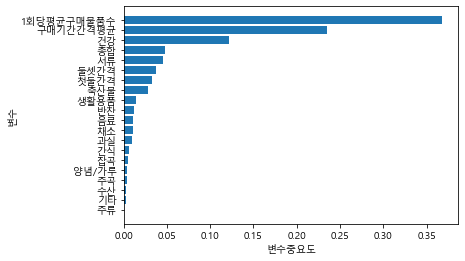

In [381]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [305]:
# 배송, 모바일알람 제거
# 종속변수는 평균구매금액에서 실질적 구매월수로 나눈 평균

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.692
Score on test set : 0.423
Score on valid set : -0.237


In [260]:
# 배송, 모바일알람 제거
# 종속변수는 물가지수반영하고 실질적 구매월수를 반영한 가중평균

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.666
Score on test set : -10.285
Score on valid set : 0.273


In [166]:
# 배송, 모바일알람 추가한거

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.751
Score on test set : 0.367
Score on valid set : 0.355


In [160]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.691
Score on test set : 0.408
Score on valid set : 0.322


In [161]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# training data 설명력
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test data 설명력
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 1.000
Score on test set : 0.058
Score on valid set : -0.101


# 소희가 말한 2~10월 다 합치고 train, test 나눠서 모델링

In [353]:
# 원래 종속 평균구매금액에서 실질방문월수를 나눈거
df_train_y = train_data['실질방문월대비평균구매금액']
df_train_x = train_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)
df_test_y = test_data['실질방문월대비평균구매금액']
df_test_x = test_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)

In [354]:
df_concat_y = pd.concat([df_train_y, df_test_y])
df_concat_x = pd.concat([df_train_x, df_test_x])
print(df_concat_y.shape)
print(df_concat_x.shape)

(2669,)
(2669, 20)


In [366]:
short_data = concat_data[(concat_data['첫둘간격'] < 30) & (concat_data['둘셋간격'] < 30)]

df_train_y = short_data['실질방문월대비평균구매금액']
df_train_x = short_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)
# df_test_y = test_data['실질방문월대비평균구매금액']
# df_test_x = test_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1, inplace = False)

In [367]:

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state = 1234)
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))

train data X size : (469, 20)
train data Y size : (469,)
test data X size : (206, 20)
test data Y size : (206,)
valid data X size : (353, 20)
valid data Y size : (353,)


In [368]:
# 초기구매 3개씩만 대분류비율로
# 총합구매 수 변수 추가
# 구매간격 변수 추가(첫번째-두번째 구매기간 간격, 두번째-세번째 구매기간 간격, 둘의 평균)
# 1번, 2번만 방문한 고객 제거
# 배송서비스, 모바일알람 변수 추가한거 제거
# 종속변수는 기존 평균구매금액에서 실질적 구매월수로 나눈 평균

# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.910
Score on test set : 0.310
Score on valid set : 0.286


Text(0, 0.5, '변수')

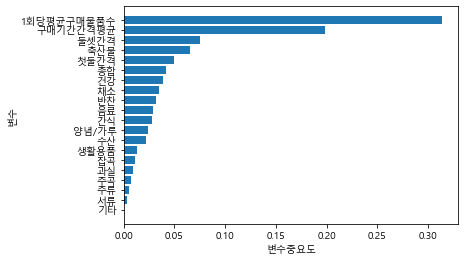

In [333]:
plt.rcParams['font.family'] = 'Malgun Gothic'
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [369]:
# 배송, 모바일알람 제거
# 종속변수는 평균구매금액에서 실질적 구매월수로 나눈 평균

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.841
Score on test set : 0.309
Score on valid set : 0.283


Text(0, 0.5, '변수')

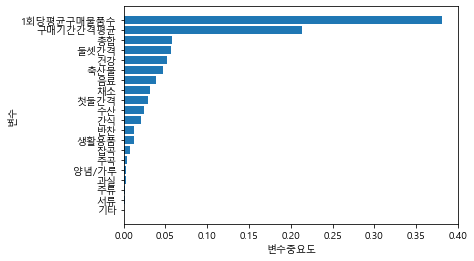

In [334]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [330]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# training data 설명력
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test data 설명력
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 1.000
Score on test set : 0.091
Score on valid set : -0.355


In [380]:
concat_data.columns

Index(['간식', '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념과가루', '음료', '잡곡',
       '주곡', '주류', '채소', '축산물', '총합', '평균구매물품수', '평균구매금액', '첫둘간격', '둘셋간격',
       '구매기간간격평균', '실질방문월대비평균구매금액'],
      dtype='object')

### D매장 고객만

In [176]:
#memberD.set_index('회원번호', inplace = True)

train_data_D2 = train_data[train_data.index.isin(memberD.index)]
train_data_D = train_data_D2.merge(memberD[['거리']], left_index = True,right_index = True, how = 'left')

test_data_D2 = test_data[test_data.index.isin(memberD.index)]
test_data_D = test_data_D2.merge(memberD[['거리']], left_index = True,right_index = True, how = 'left')
train_data_D

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
26676288,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.250000,0.000000,...,0.0,0.500000,0.250000,4.0,1.333333,4642.333333,13,91,52.0,2
27066048,0.125000,0.0,0.00,0.0,0.375000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.375000,0.125000,8.0,2.066667,50480.500000,6,24,15.0,18
28871936,0.200000,0.0,0.00,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.200000,0.400000,5.0,1.750000,12156.333333,5,94,49.5,2
39640448,0.111111,0.0,0.00,0.0,0.444444,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.444444,0.000000,9.0,3.000000,10395.000000,16,84,50.0,2
51574528,0.333333,0.0,0.00,0.0,0.000000,0.0,0.0,0.333333,0.000000,0.000000,...,0.0,0.000000,0.000000,3.0,1.600000,10848.222222,25,50,37.5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618521088,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.500000,0.166667,...,0.0,0.000000,0.333333,6.0,2.333333,106154.666667,2,2,2.0,2
1620061568,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.714286,...,0.0,0.285714,0.000000,7.0,2.416667,253244.333333,2,2,2.0,2
1621648448,0.333333,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.333333,...,0.0,0.000000,0.000000,3.0,2.500000,43841.000000,3,49,26.0,7


In [178]:
test_data_D

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
322335232,0.600000,0.000000,0.0,0.0,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.0,2.500000,26610.5,12,10,11.0,8
335308672,0.000000,0.000000,0.0,0.0,0.600000,0.000000,0.000000,0.200000,0.200000,0.000000,...,0.0,0.000000,0.000000,5.0,1.666667,30344.0,18,3,10.5,18
982486592,0.300000,0.000000,0.0,0.0,0.100000,0.100000,0.000000,0.000000,0.100000,0.200000,...,0.1,0.000000,0.100000,10.0,2.750000,125108.0,8,9,8.5,2
1180692544,0.200000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.400000,0.200000,5.0,1.714286,49774.0,2,3,2.5,2
1352146112,0.285714,0.000000,0.0,0.0,0.142857,0.428571,0.000000,0.000000,0.000000,0.000000,...,0.0,0.142857,0.000000,7.0,2.250000,87298.0,7,11,9.0,2
1469467584,0.172414,0.051724,0.0,0.0,0.258621,0.000000,0.000000,0.086207,0.086207,0.172414,...,0.0,0.172414,0.000000,11.6,3.657143,83420.5,10,7,8.5,7
1528321344,0.500000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.0,0.000000,0.000000,6.0,2.000000,11917.5,7,43,25.0,2
1628543488,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.666667,0.333333,3.0,1.000000,17325.5,13,8,10.5,2
1628859008,0.166667,0.000000,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.166667,0.000000,6.0,2.400000,44702.0,6,37,21.5,2


In [188]:
#memberC.set_index('회원번호', inplace = True)

train_data_C2 = train_data[train_data.index.isin(memberC.index)]
train_data_C = train_data_C2.merge(memberC[['거리']], left_index = True,right_index = True, how = 'left')

test_data_C2 = test_data[test_data.index.isin(memberC.index)]
test_data_C = test_data_C2.merge(memberC[['거리']], left_index = True,right_index = True, how = 'left')
train_data_C

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
19727424,0.000000,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.500000,0.000000,4.0,2.000000,19351.666667,40,2,21.0,7
21134272,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,...,0.0,0.500000,0.000000,4.0,1.200000,9560.125000,25,77,51.0,2
23437568,0.142857,0.0,0.000000,0.0,0.142857,0.000000,0.000000,0.285714,0.142857,0.000000,...,0.0,0.142857,0.142857,7.0,2.142857,35257.500000,14,8,11.0,2
37415104,0.500000,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.375000,0.000000,8.0,3.250000,11029.111111,19,151,85.0,16
42402176,0.000000,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.500000,0.250000,4.0,1.363636,13631.250000,13,114,63.5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622066048,0.333333,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.333333,0.000000,3.0,1.230769,46201.000000,3,1,2.0,2
1622244224,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.000000,0.166667,0.166667,0.333333,...,0.0,0.000000,0.166667,6.0,2.000000,21505.000000,20,29,24.5,2
1622565312,0.000000,0.0,0.000000,0.0,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,...,0.0,0.444444,0.000000,9.0,2.000000,89711.333333,5,6,5.5,2


In [183]:
test_data_C

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
274353920,0.000000,0.0,0.000000,0.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.428571,0.285714,7.0,2.333333,50722.5,4,3,3.5,NaN
335544384,0.000000,0.0,0.000000,0.0,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.600000,5.0,1.666667,25413.5,33,20,26.5,NaN
464892736,0.090909,0.0,0.000000,0.0,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,...,0.0,0.454545,0.181818,11.0,3.285714,112998.5,2,4,3.0,NaN
484675840,0.333333,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.111111,0.111111,0.000000,...,0.0,0.111111,0.222222,9.0,2.200000,64793.5,12,5,8.5,NaN
560725440,0.250000,0.0,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.0,0.000000,0.000000,4.0,1.333333,32353.5,3,1,2.0,NaN
693481408,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.444444,0.444444,9.0,3.000000,48368.0,4,44,24.0,NaN
764805632,0.142857,0.0,0.142857,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.571429,...,0.0,0.000000,0.000000,7.0,2.000000,30775.0,3,4,3.5,NaN
963119232,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,...,0.0,0.250000,0.000000,4.0,1.333333,16511.5,17,21,19.0,NaN
1009565632,0.375000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.0,0.500000,0.000000,8.0,2.600000,97635.5,6,3,4.5,NaN


In [190]:
df_train_y = train_data_C['평균구매금액']
df_train_x = train_data_C.drop('평균구매금액', axis = 1, inplace = False)
df_test_y = test_data_C['평균구매금액']
df_test_x = test_data_C.drop('평균구매금액', axis = 1, inplace = False)

df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 1/7, random_state = 1234)


In [191]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))

train data X size : (841, 21)
train data Y size : (841,)
test data X size : (29, 21)
test data Y size : (29,)
valid data X size : (141, 21)
valid data Y size : (141,)


In [181]:
# D
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.948
Score on test set : -0.268
Score on valid set : 0.662


In [192]:
# C
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.745
Score on test set : -0.180
Score on valid set : 0.149


In [194]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [195]:
train_data

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주곡,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,,,,,,,,,,,,,,,,,,,
19727424,0.000000,0.0,0.000000,0.0,0.250000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.500000,0.000000,4.0,2.000000,19351.666667,40,2,21.0
21134272,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.250000,0.250000,0.000000,...,0.0,0.0,0.500000,0.000000,4.0,1.200000,9560.125000,25,77,51.0
22259008,0.142857,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.571429,0.000000,0.000000,...,0.0,0.0,0.285714,0.000000,7.0,2.250000,24671.875000,17,42,29.5
23437568,0.142857,0.0,0.000000,0.0,0.142857,0.000,0.000000,0.285714,0.142857,0.000000,...,0.0,0.0,0.142857,0.142857,7.0,2.142857,35257.500000,14,8,11.0
26676288,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.500000,0.250000,4.0,1.333333,4642.333333,13,91,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626344128,0.000000,0.0,0.000000,0.0,0.000000,0.125,0.000000,0.250000,0.000000,0.125000,...,0.0,0.0,0.375000,0.125000,8.0,1.900000,49910.000000,2,6,4.0
1626518592,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.500000,4.0,1.200000,19379.666667,5,10,7.5
1626628096,0.411765,0.0,0.000000,0.0,0.196078,0.000,0.000000,0.000000,0.000000,0.196078,...,0.0,0.0,0.196078,0.000000,5.1,1.700000,6292.333333,7,33,20.0


In [196]:
test_data

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주곡,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,,,,,,,,,,,,,,,,,,,
123643008,0.117647,0.000000,0.0,0.0,0.294118,0.058824,0.000000,0.058824,0.058824,0.000000,...,0.0,0.0,0.352941,0.058824,17.0,5.666667,112375.0,10,9,9.5
168114624,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.666667,0.000000,3.0,1.000000,8471.0,7,42,24.5
177064256,0.000000,0.833333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.0,0.0,0.000000,0.000000,12.0,4.000000,118693.5,44,1,22.5
183465600,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.000000,0.000000,4.0,1.750000,23739.0,9,12,10.5
200774656,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.0,0.0,0.000000,0.666667,3.0,1.333333,46328.5,3,2,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640074816,0.250000,0.000000,0.0,0.0,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.0,0.0,0.375000,0.125000,8.0,3.285714,313388.0,3,2,2.5
1640117504,0.250000,0.000000,0.0,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.500000,4.0,1.333333,38000.0,2,8,5.0
1640149056,0.333333,0.000000,0.0,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.500000,...,0.0,0.0,0.083333,0.000000,12.0,4.000000,87201.0,4,14,9.0


In [335]:
concat_data = pd.concat([train_data, test_data])
concat_data

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,...,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,실질방문월대비평균구매금액
회원번호,,,,,,,,,,,,,,,,,,,,,
19727424,0.000000,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.500000,0.000000,4.0,2.000000,19351.666667,40,2,21.0,23222.00
21134272,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.250000,0.250000,0.0,...,0.0,0.500000,0.000000,4.0,1.200000,9560.125000,25,77,51.0,15296.20
22259008,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.571429,0.000000,0.0,...,0.0,0.285714,0.000000,7.0,2.250000,24671.875000,17,42,29.5,49343.75
23437568,0.142857,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.285714,0.142857,0.0,...,0.0,0.142857,0.142857,7.0,2.142857,35257.500000,14,8,11.0,47010.00
26676288,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,...,0.0,0.500000,0.250000,4.0,1.333333,4642.333333,13,91,52.0,13927.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640074816,0.250000,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.125000,0.000000,0.0,...,0.0,0.375000,0.125000,8.0,3.285714,313388.000000,3,2,2.5,313388.00
1640117504,0.250000,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.500000,4.0,1.333333,38000.000000,2,8,5.0,38000.00
1640149056,0.333333,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.5,...,0.0,0.083333,0.000000,12.0,4.000000,87201.000000,4,14,9.0,87201.00


In [342]:
concat_data[(concat_data['첫둘간격'] < 7) & (concat_data['둘셋간격'] < 7)]

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념과가루,음료,...,주류,채소,축산물,총합,평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균,실질방문월대비평균구매금액
회원번호,,,,,,,,,,,,,,,,,,,,,
39820480,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,5.0,2.048000,58259.200000,2,3,2.5,58259.200000
46995776,0.200000,0.0,0.000000,0.0,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,...,0.0,0.200000,0.200000,5.0,1.500000,5849.666667,3,6,4.5,17549.000000
49083776,0.363636,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.181818,0.090909,...,0.0,0.090909,0.181818,11.0,2.695652,70375.555556,1,4,2.5,79172.500000
68976384,0.307692,0.0,0.076923,0.0,0.153846,0.0,0.000000,0.000000,0.076923,0.076923,...,0.0,0.153846,0.153846,13.0,4.787879,203844.555556,1,5,3.0,203844.555556
78516224,0.000000,0.0,0.000000,0.0,0.500000,0.0,0.000000,0.250000,0.000000,0.000000,...,0.0,0.000000,0.250000,4.0,1.400000,7317.333333,5,1,3.0,21952.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636535424,0.200000,0.0,0.000000,0.0,0.600000,0.2,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.0,1.400000,61836.000000,3,5,4.0,61836.000000
1636973440,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.333333,0.333333,3.0,1.571429,54004.000000,1,5,3.0,54004.000000
1640074816,0.250000,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.125000,0.000000,0.000000,...,0.0,0.375000,0.125000,8.0,3.285714,313388.000000,3,2,2.5,313388.000000


In [348]:
print(concat_data['첫둘간격'].median())
print(concat_data['둘셋간격'].median())

22.0
20.0


{'whiskers': [<matplotlib.lines.Line2D at 0x15a9556b108>,
 'caps': [<matplotlib.lines.Line2D at 0x15a9557be48>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a9556b208>],
 'medians': [<matplotlib.lines.Line2D at 0x15a95580ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a95580f48>],
 'means': []}

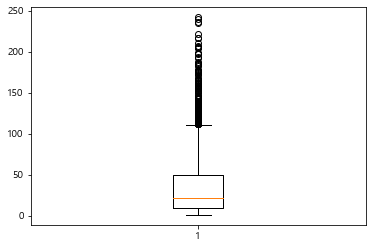

In [346]:
plt.boxplot(concat_data['첫둘간격'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15a95599d08>,
 'caps': [<matplotlib.lines.Line2D at 0x15a955c49c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a955bf7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x15a955c4b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a955c9a08>],
 'means': []}

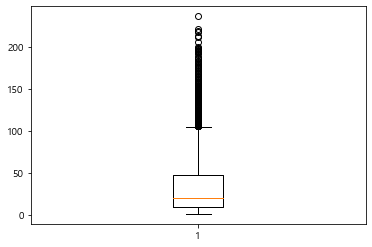

In [347]:
plt.boxplot(concat_data['둘셋간격'])

In [202]:
word = concat_data.columns[0] + " ~ "
for i in concat_data.columns[1:]:
    word = word + "'"  + i + "'" + "+"
word

"간식 ~ '건강'+'과실'+'기타'+'반찬'+'생활용품'+'서류'+'수산'+'양념/가루'+'음료'+'잡곡'+'주곡'+'주류'+'채소'+'축산물'+'총합'+'1회당평균구매물품수'+'평균구매금액'+'첫둘간격'+'둘셋간격'+'구매기간간격평균'+"

In [306]:
train_data.columns

Index(['간식', '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념/가루', '음료', '잡곡',
       '주곡', '주류', '채소', '축산물', '총합', '1회당평균구매물품수', '평균구매금액', '첫둘간격', '둘셋간격',
       '구매기간간격평균', '실질방문월대비평균구매금액'],
      dtype='object')

In [206]:
reg_model = smf.ols(formula = """'평균구매금액' ~ '간식' + '건강'+'과실'+'기타'+'반찬'+'생활용품'+'서류'+'수산'+'양념/가루'+'음료'+'잡곡'+'주곡'+'주류'+'채소'+'축산물'+'총합'+'1회당평균구매물품수'+'평균구매금액'+'첫둘간격'+'둘셋간격'+'구매기간간격평균'""", data = train_data)
reg_result = reg_model.fit()
print(reg_result.summary())

PatsyError: Number of rows mismatch between data argument and '평균구매금액' (2575 versus 1)
    '평균구매금액' ~ '간식' + '건강'+'과실'+'기타'+'반찬'+'생활용품'+'서류'+'수산'+'양념/가루'+'음료'+'잡곡'+'주곡'+'주류'+'채소'+'축산물'+'총합'+'1회당평균구매물품수'+'평균구매금액'+'첫둘간격'+'둘셋간격'+'구매기간간격평균'
    ^^^^^^^^

In [207]:
word = concat_data.columns[0] + " ~ "
for i in concat_data.columns[1:]:
    word = word +  i  + "+"
word

'간식 ~ 건강+과실+기타+반찬+생활용품+서류+수산+양념/가루+음료+잡곡+주곡+주류+채소+축산물+총합+1회당평균구매물품수+평균구매금액+첫둘간격+둘셋간격+구매기간간격평균+'

In [338]:
reg_model = smf.ols(formula = """실질방문월대비평균구매금액 ~ 간식 + 건강+과실+기타+반찬+생활용품+서류+수산+음료+잡곡+주곡+주류+양념과가루+채소+축산물+총합+평균구매물품수+첫둘간격+둘셋간격+구매기간간격평균""", data = concat_data)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:          실질방문월대비평균구매금액   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     82.62
Date:                Tue, 05 May 2020   Prob (F-statistic):          3.11e-240
Time:                        19:58:12   Log-Likelihood:                -30964.
No. Observations:                2669   AIC:                         6.197e+04
Df Residuals:                    2650   BIC:                         6.208e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.376e+04   2610.095      9.104      0.0

In [336]:
concat_data.rename(columns = {'1회당평균구매물품수' : '평균구매물품수'}, inplace = True)
concat_data.columns

Index(['간식', '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념/가루', '음료', '잡곡',
       '주곡', '주류', '채소', '축산물', '총합', '평균구매물품수', '평균구매금액', '첫둘간격', '둘셋간격',
       '구매기간간격평균', '실질방문월대비평균구매금액'],
      dtype='object')

In [337]:
concat_data.rename(columns = {'양념/가루' : '양념과가루'}, inplace = True)
concat_data.columns

Index(['간식', '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념과가루', '음료', '잡곡',
       '주곡', '주류', '채소', '축산물', '총합', '평균구매물품수', '평균구매금액', '첫둘간격', '둘셋간격',
       '구매기간간격평균', '실질방문월대비평균구매금액'],
      dtype='object')

In [211]:
train_data.columns

Index(['간식', '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념/가루', '음료', '잡곡',
       '주곡', '주류', '채소', '축산물', '총합', '1회당평균구매물품수', '평균구매금액', '첫둘간격', '둘셋간격',
       '구매기간간격평균'],
      dtype='object')

In [339]:
df_raw_x = concat_data.drop(['평균구매금액','실질방문월대비평균구매금액'], axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [340]:
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
0,const,0.000
16,총합,3.617
17,평균구매물품수,3.622
18,첫둘간격,inf
15,축산물,inf
14,채소,inf
13,주류,inf
12,주곡,inf
11,잡곡,inf
19,둘셋간격,inf


In [ ]:
train_data

In [222]:
sorted_vip = sorted_final[['회원번호','Gold_member']].drop_duplicates()
sorted_vip.set_index('회원번호', inplace = True)
sorted_vip

,Gold_member
회원번호,
18764160,0
18942336,0
19627200,0
19727424,0
19996544,0
...,...
1640149056,0
1641455680,0
1641643136,0


In [225]:
vip = sorted_vip.merge(test_data, left_index = True, right_index = True, how = 'inner')
vip[vip['Gold_member'] == 1]

,Gold_member,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,...,주곡,주류,채소,축산물,총합,1회당평균구매물품수,평균구매금액,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,,,,,,,,,,,,,,,,,,,


In [ ]:
sorted_final = sorted_123[sorted_123['회원번호'].isin(period_final2.index)]

sorted_alarm_delivery = sorted_final[['회원번호','모바일알람여부','배송서비스신청여부']].drop_duplicates()
sorted_alarm_delivery.set_index('회원번호', inplace = True)
sorted_alarm_delivery

In [ ]:
# 배송, 모바일알람 제거
# 종속변수는 평균구매금액에서 실질적 구매월수로 나눈 평균

gb_uncustomized = GradientBoostingRegressor(random_state = 3)
gb_uncustomized.fit(df_train_x, df_train_y)

pred = gb_uncustomized.predict(df_test_x)
actual = df_test_y

df_result = pd.DataFrame(data = {'pred' : pred, 'actual' : actual})
df_result['차이'] = df_result['actual'] - df_result['pred']
outlier = df_result[df_result['차이'] > 100000]

df_test_y_outlierX = df_test_y[~(df_test_y.index.isin(outlier.index))]
df_test_x_outlierX = df_test_x[~(df_test_x.index.isin(outlier.index))]
#actual = df_test_y_outlierX
#df_result.reset_index(drop = True, inplace = True)

# plt.figure(figsize = (16,10))
# plt.plot(df_result.index, df_result.pred, label = "predict")
# plt.plot(df_result.index, df_result.actual, label = "actual")
# plt.legend()
# plt.show()

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x_outlierX, df_test_y_outlierX)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))

In [ ]:
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x_outlierX, df_train_y_outlierX)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x_outlierX, df_test_y_outlierX)))
print("Score on valid set : {:.3f}".format(gb_uncustomized.score(df_valid_x, df_valid_y)))


In [424]:
df_train_final = df_train_x_outlierX.merge(df_train_y_outlierX, left_index = True, right_index = True, how = 'inner')
df_test_final = df_test_x_outlierX.merge(df_test_y_outlierX, left_index = True, right_index = True, how = 'inner')
df_valid_final = df_valid_x.merge(df_valid_y, left_index = True, right_index = True, how = 'inner')
print(df_train_final.shape)
print(df_test_final.shape)
print(df_valid_final.shape)

(2568, 21)
(92, 21)
(353, 21)


In [426]:
df_train_final.to_csv('df_train_raw.csv', index = True)
df_test_final.to_csv('df_test_raw.csv', index = True)
df_valid_final.to_csv('df_valid_raw.csv', index = True)

In [422]:
df_valid_x

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념과가루,음료,잡곡,주곡,주류,채소,축산물,총합,평균구매물품수,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,,,,,,,,,,,,,,,,,,
758684544,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.200000,0.200000,0.0,0.000000,0.000000,0.0,0.200000,0.200000,5.0,1.875000,14,20,17.0
572247488,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.222222,0.222222,0.0,0.111111,0.111111,9.0,2.500000,8,13,10.5
85413120,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.750000,0.250000,4.0,1.800000,3,12,7.5
1139619264,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.166667,0.0,0.000000,0.000000,0.0,0.166667,0.666667,6.0,2.619048,12,6,9.0
920802432,0.400000,0.0,0.000000,0.0,0.200000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.400000,0.000000,5.0,2.142857,6,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913283776,0.666667,0.0,0.166667,0.0,0.000000,0.166667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6.0,1.950000,7,9,8.0
1575018304,0.142857,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.142857,0.000000,0.0,0.142857,0.142857,0.0,0.285714,0.000000,7.0,1.758621,1,3,2.0
1516478208,0.000000,0.0,0.000000,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.750000,4.0,2.000000,5,6,5.5
